# Problem Statement
- In this problem statement we are given a dataset that contain the features of the house.
- Our goal is to build a machine learning model that can predict houe price based on given features.

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df=pd.read_csv('data.csv')
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


# Drop Unnecessary col
- we don't need `street` and `sate_zip` col

In [3]:
df.drop(columns=['street','statezip'],inplace=True)

# Data Preprocessing
- Shape of the data
- Columns
- Dtypes
- Null Values
- Duplicates
- Statistical Summary
- Unique Values

In [4]:
df.shape

(4600, 16)

In [5]:
print(f" dataset contain {df.shape[0]} rows and {df.shape[1]} columns")

 dataset contain 4600 rows and 16 columns


# conslussion
- Dataset contain 4600 rows and 16 columns

In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'country'],
      dtype='object')

- **date**: Date show on whcih date hsouse is sold.
- **Price** -> Price show the price of the house.
- **Bedrooms**-> Total nbr of bedroom in the house.
- **Bathroom** -> Total bathroom in the house.
- **Floors** -> Total floors in the house.
- **WaterFront**-> Tell us is house contain water front or not.
- **View** -> Show the total nbr of views.
- **Condition** -> Show the condition of the hosue.
- **yr_build** -> It show that on which year house can build.
- **City** -> It show the city of the house.
- **Country** -> Show the country in which house is palced.
- **sqft_lot** -> The total area of the lot on which the property.(including garden, garage,yard etc)
- **sqft_living** -> The total interior living space area in which person are living(this include only bedroom,bathroom,kitchen).
- **sqft_above** -> The square footage of the living space above ground level.
- **sqft_basement** -> The square footage of the basement area.

# Dtypes

In [7]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city              object
country           object
dtype: object

# Conclussion
- Date in `object` form now change into `datetime`

In [8]:
df['date']=pd.to_datetime(df['date'])

In [9]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
city                     object
country                  object
dtype: object

# Null Values

In [10]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
country          0
dtype: int64

# Conclussion
- There is no `null` values found in this dataset

# Duplicates

In [11]:
df.duplicated().sum()

0

# conslussion
- No Duplicates in this datset

# Satistical Summary

In [12]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,2014-06-07 03:14:42.782608640,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
min,2014-05-02 00:00:00,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,2014-05-21 00:00:00,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,2014-06-09 00:00:00,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,2014-06-24 00:00:00,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2014-07-10 00:00:00,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536


# Conclussion
- **Pice**
    - we see that some house that conatin `0` price after we see that `0` denotes the missing value.
    - `25%` = `300000`
    - `50%` = `400000`
    - `75%` = `600000`
    - `max` = `20000000`
    - We see that max price is to high actually these are the outliers.
- **Bedroom and Bathrooms**
    - Similare bedroom and bathroom conatin 0 bedroom and 0 bathroom so `0` denotes the missing value.
    - **Bedrooms**
        - `25%` = `3 berooms`
        - `50%` = `3 bedrooms`
        - `75%` = `4 bedrooms`
        - `max` = `9 bedrooms`
        - Suddenly bedroom go to 9 bedrooms
        - `9 bedrooms` are the outliers
    - **Bathrooms**
        - `25%` = `1.75 bathrooms`
        - `50%` = `2.25 bathrooms`
        - `75%` = `2.25 bathrooms`
        - `max` = `8 bathrooms`
        - Suddenly bathrooms go to 8 bathrooms
        - `8 bathroomss` are the outliers
- **Water Front**
    - We see that `75%` conatin 0 water front and remaing conatin water front. 
- **View**
    - We see that `75%` can't view the house before buying and `25%` people can see the hosue before buying. 

In [13]:
df.describe(include='object')

,city,country
count,4600,4600
unique,44,1
top,Seattle,USA
freq,1573,4600


# Unique Values

In [14]:
for i in df.select_dtypes('object').columns:
    print("Unique valus in ",i)
    print(df[i].unique())
    print("Total Unique values: ",df[i].nunique())
    print("-"*50)
    print()

Unique valus in  city
['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']
Total Unique values:  44
--------------------------------------------------

Unique valus in  country
['USA']
Total Unique values:  1
--------------------------------------------------



# Info

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  city           4600 non-null   object        
 15  country        4600 n

# Exploratory Data Analysis

## Univaaite Analysis 
#### Num-col

In [16]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA


In [17]:
def fun_plot(col):
    fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
    ax1.set_title(f"Histogram of {col}")
    sns.histplot(df[col],ax=ax1)
    
    ax2.set_title(f"Kde of {col}")
    sns.kdeplot(df[col],ax=ax2)
    
    ax3.set_title(f"Boxplot of {col}")
    sns.boxplot(df[col],ax=ax3)
    plt.show()

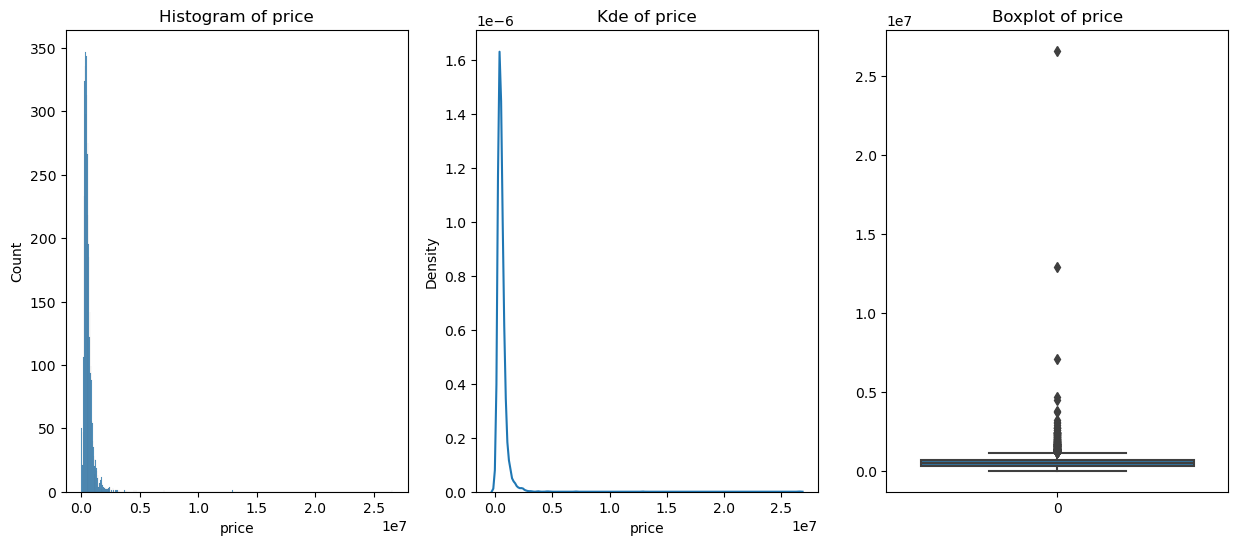

In [18]:
fun_plot('price')

# Conclussion
- `Price` col contain the outliier so we can handle outlers.
- `price` col conatin `0` value in some place i-e i s the `missing` values.

In [19]:
df[df['price']==0].shape

(49, 16)

In [20]:
df['price']=df['price'].replace(0,np.nan)

In [21]:
df.shape

(4600, 16)

In [22]:
df.isnull().mean()*100

date             0.000000
price            1.065217
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
view             0.000000
condition        0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.000000
city             0.000000
country          0.000000
dtype: float64

# Conclussion
- `Price` col contain `1%` missing values so we can drop them.

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(4551, 16)

### Handle outliers

In [25]:
low=df['price'].quantile(0.01)
low

148000.0

In [26]:
high=df['price'].quantile(0.99)
high

2016000.0

<Axes: ylabel='Density'>

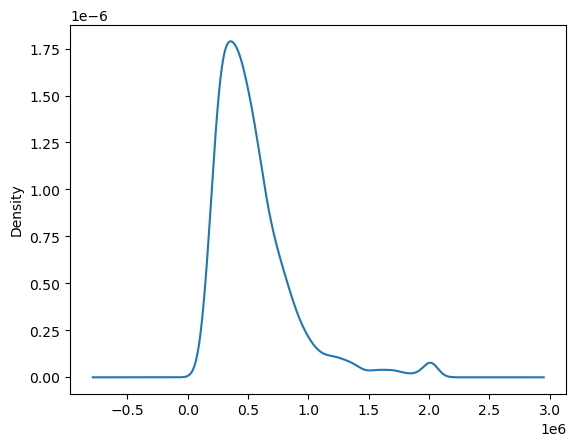

In [27]:
df['price'].clip(lower=low,upper=high).plot(kind='kde')

<Axes: >

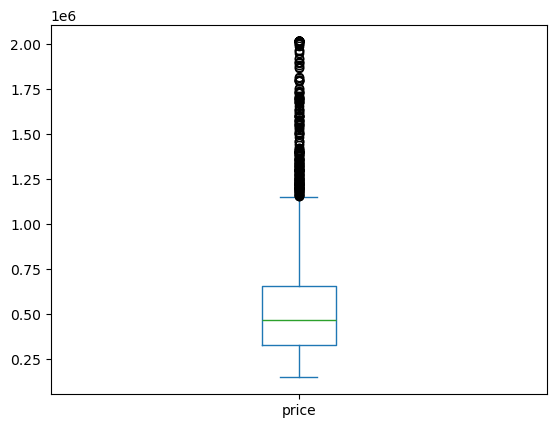

In [28]:
df['price'].clip(lower=low,upper=high).plot(kind='box')

<Axes: >

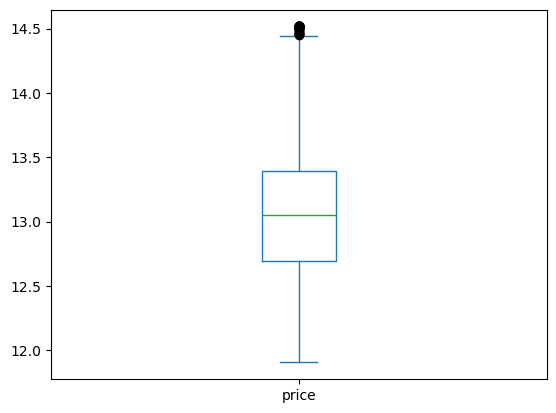

In [29]:
df['price'].clip(lower=low,upper=high).apply(np.log1p).plot(kind='box')

In [30]:
df['price'].skew()

25.023817262008482

In [31]:
df['price'].clip(lower=low,upper=high).skew()

2.0227337325064454

# Conclussion
- Price Col contain outlier values so we can handle winserization technique.
- We can apply winserization and then apply np.log1p it will give better results.
- First we can make a copy of df

## Sqft-living 

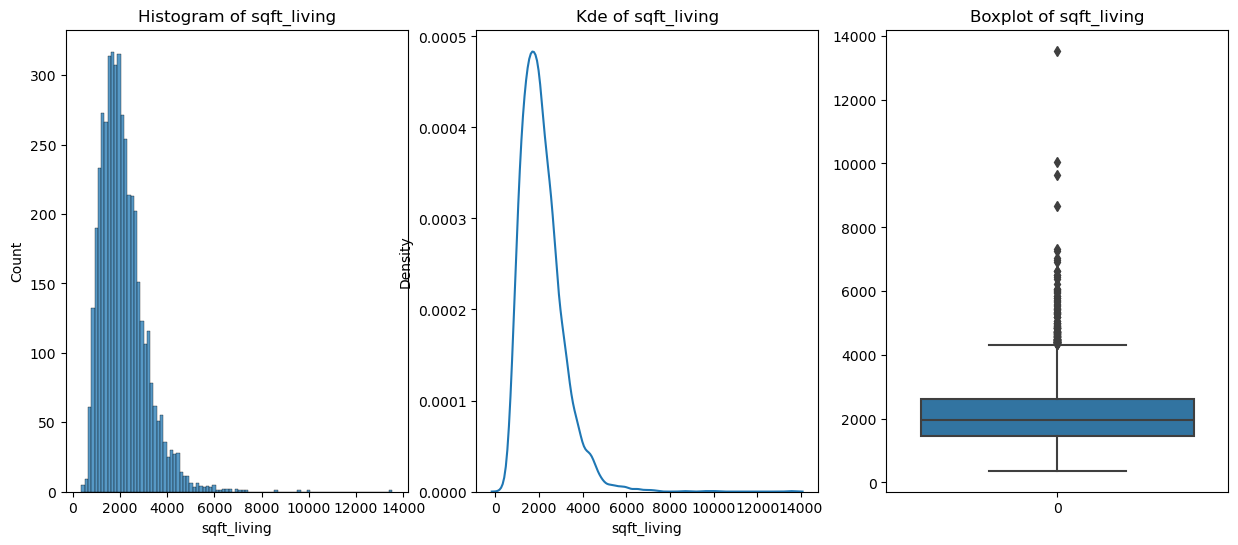

In [32]:
fun_plot('sqft_living')

In [33]:
low=df['sqft_living'].quantile(0.01)
low

720.0

In [34]:
high=df['sqft_living'].quantile(0.99)
high

5065.0

<Axes: ylabel='Density'>

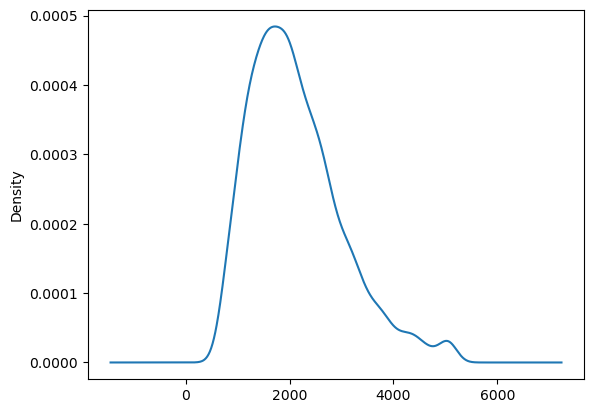

In [35]:
df['sqft_living'].clip(lower=low,upper=high).plot(kind='kde')

<Axes: >

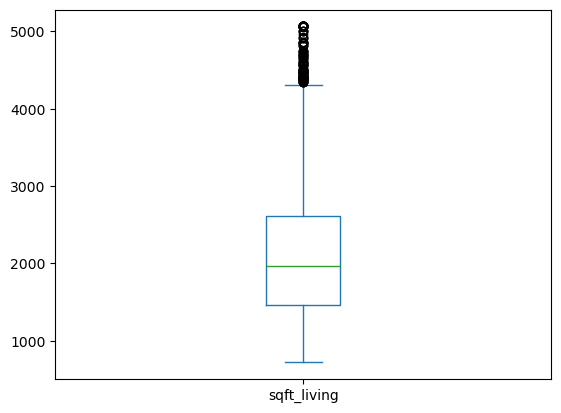

In [36]:
df['sqft_living'].clip(lower=low,upper=high).plot(kind='box')

<Axes: >

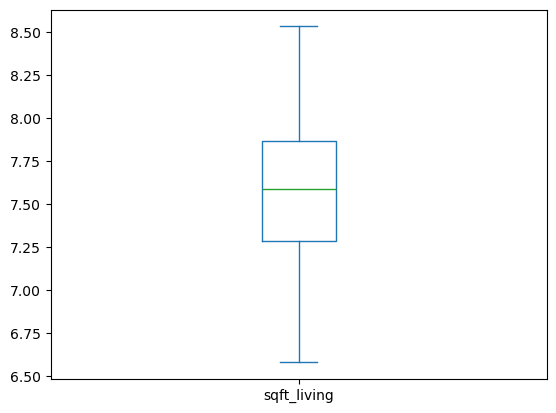

In [37]:
df['sqft_living'].clip(lower=low,upper=high).apply(np.log1p).plot(kind='box')

# Conclussion
- `sqft` conatain some outliers but should fine not to outliers.
- We can handle by applying percentile/winserization technique and then apply the log transform.

## Sqft-lot 

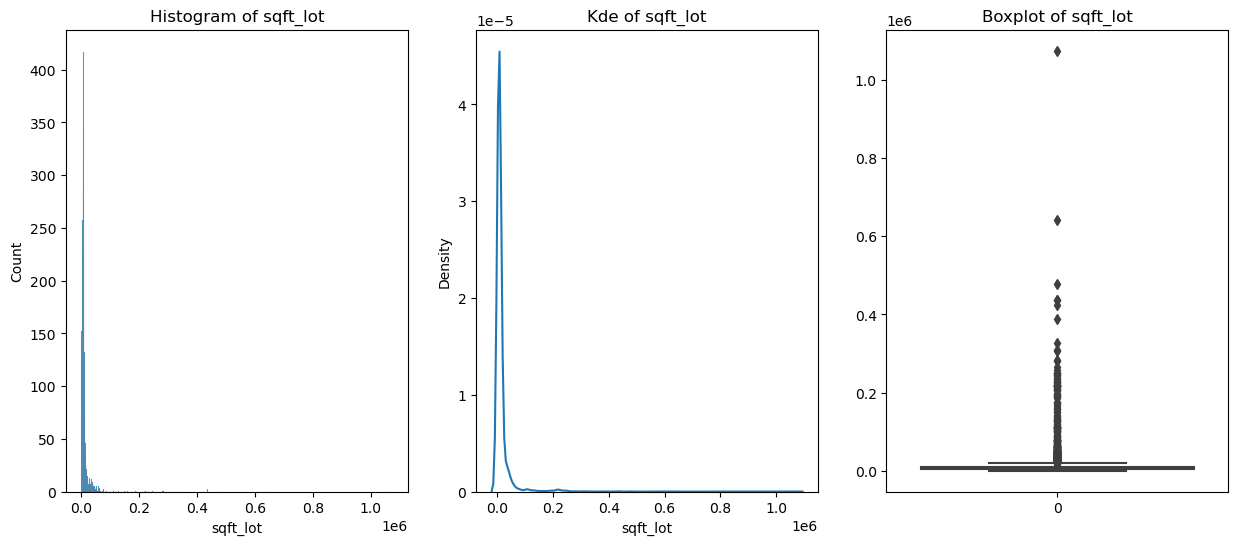

In [38]:
fun_plot("sqft_lot")

In [39]:
low=df['sqft_lot'].quantile(0.01)
high=df['sqft_lot'].quantile(0.99)

<Axes: ylabel='Density'>

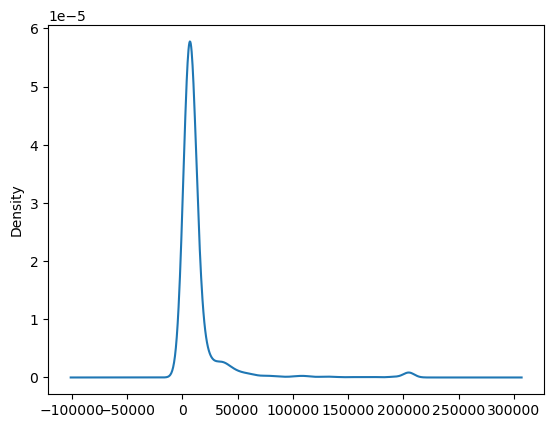

In [40]:
df['sqft_lot'].clip(lower=low,upper=high).plot(kind='kde')

<Axes: >

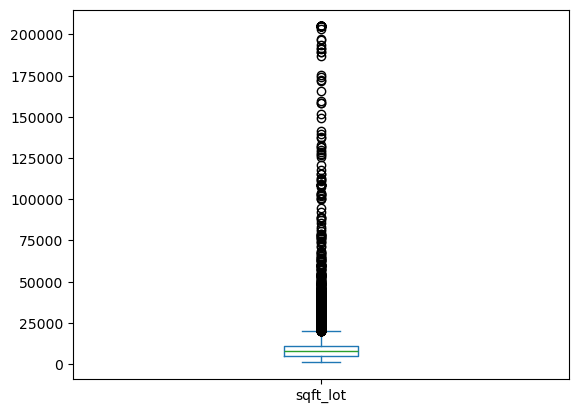

In [41]:
df['sqft_lot'].clip(lower=low,upper=high).plot(kind='box')

<Axes: >

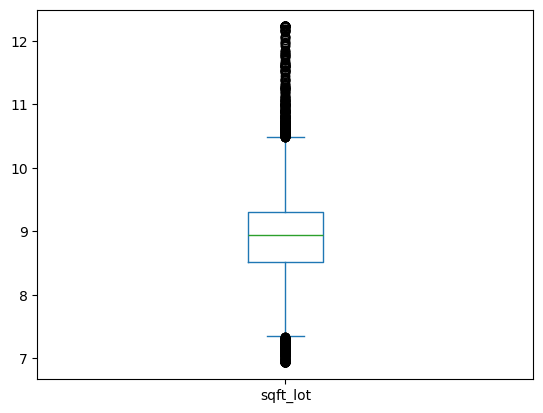

In [42]:
df['sqft_lot'].clip(lower=low,upper=high).apply(np.log1p).plot(kind='box')

# Conclussion
- `sqft lot` conatain to outliers so we can handle these outliers by thses 2 approach.
- We can apply the winsoriztion and we can see we can handle some outliers

## Sqft_above 

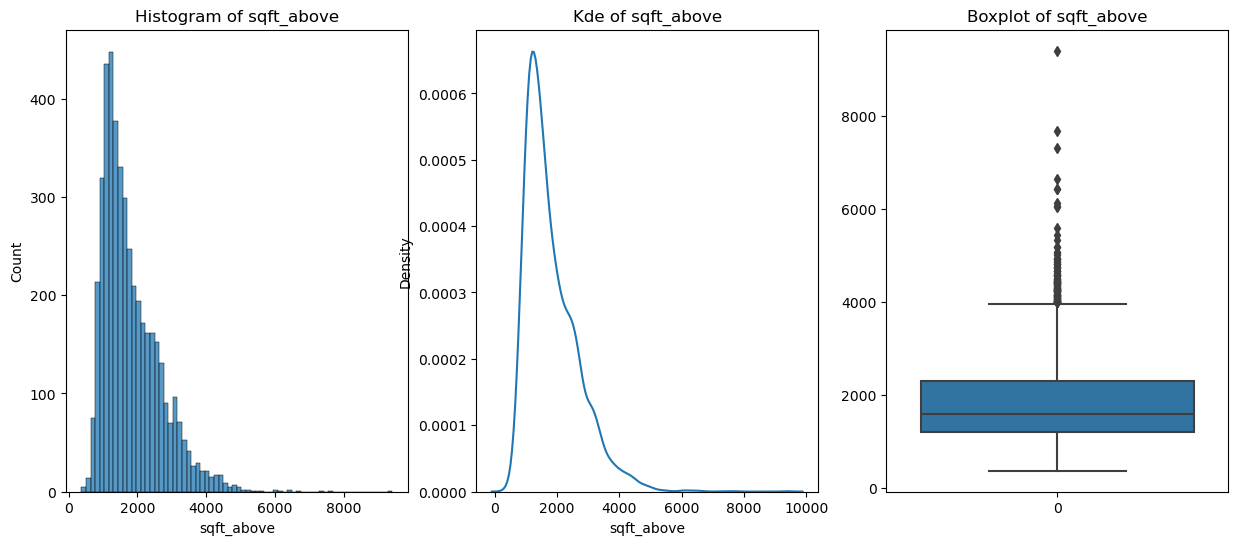

In [43]:
fun_plot('sqft_above')

In [44]:
low=df['sqft_above'].quantile(0.01)
high=df['sqft_above'].quantile(0.99)

<Axes: ylabel='Density'>

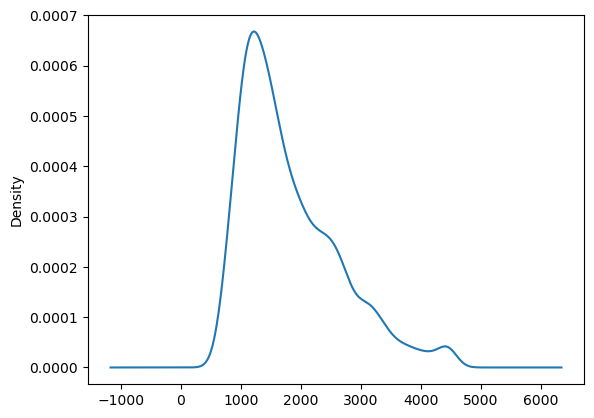

In [45]:
df['sqft_above'].clip(lower=low,upper=high).plot(kind='kde')

<Axes: >

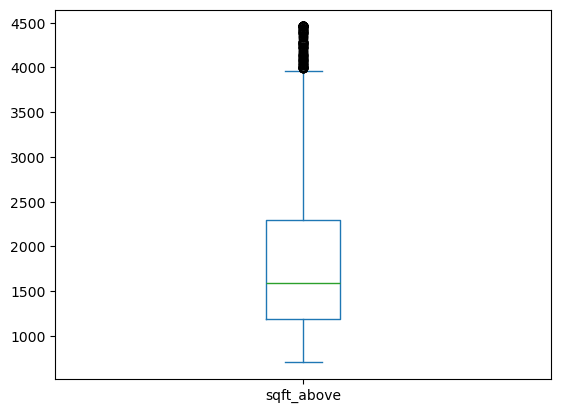

In [46]:
df['sqft_above'].clip(lower=low,upper=high).plot(kind='box')

<Axes: >

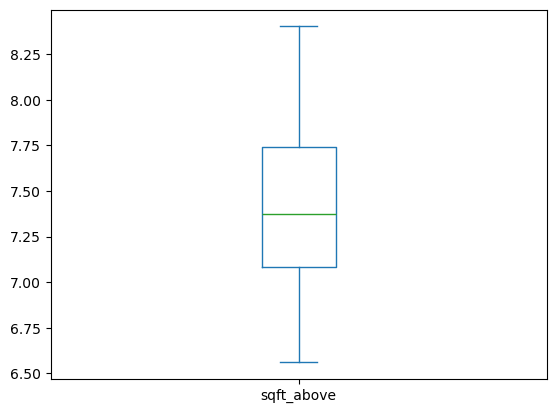

In [47]:
df['sqft_above'].clip(lower=low,upper=high).apply(np.log1p).plot(kind='box')

## Sqft-Basement 

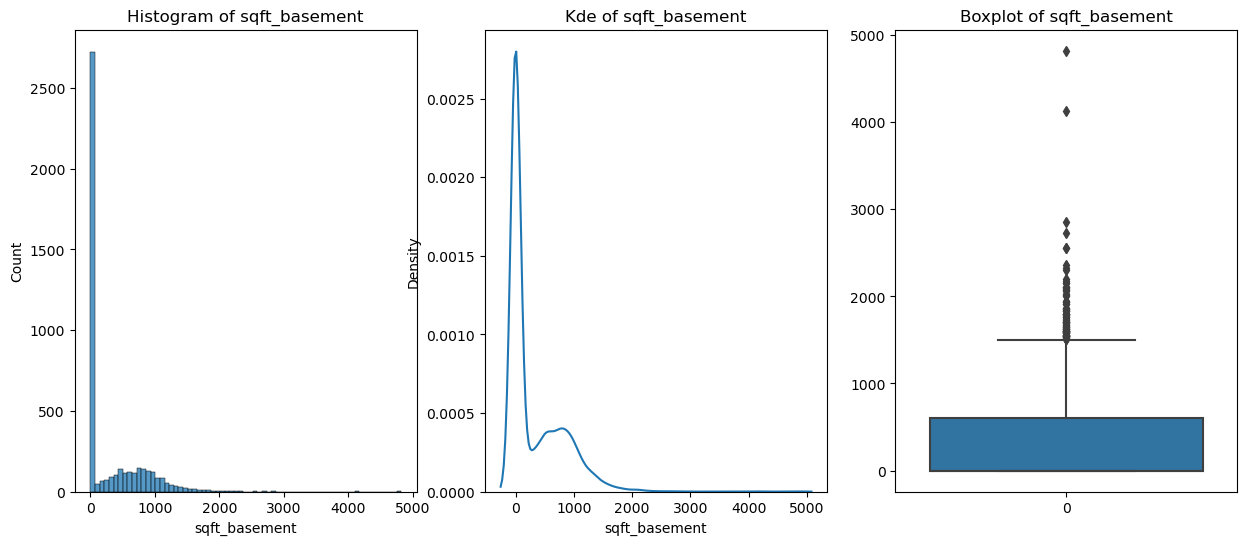

In [48]:
fun_plot('sqft_basement')

## Catagorical Col 

In [49]:
data=df['bedrooms'].value_counts()
data

bedrooms
3.0    2025
4.0    1512
2.0     561
5.0     338
6.0      59
1.0      37
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64

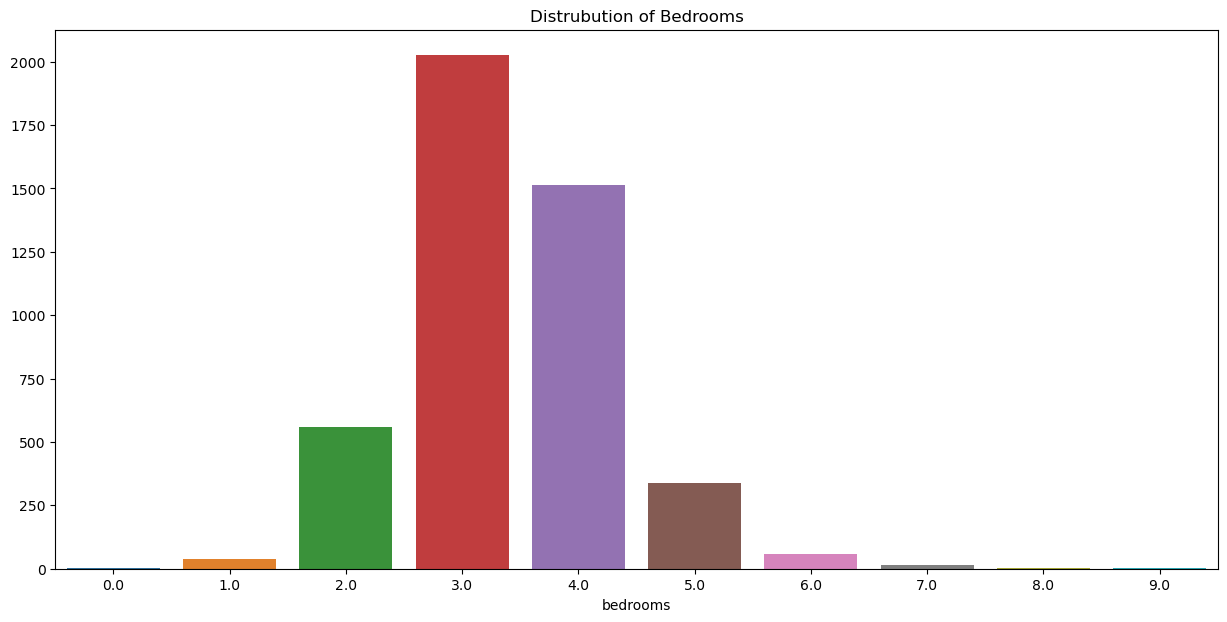

In [50]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of Bedrooms")
sns.barplot(x=data.index,y=data.values)
plt.show()

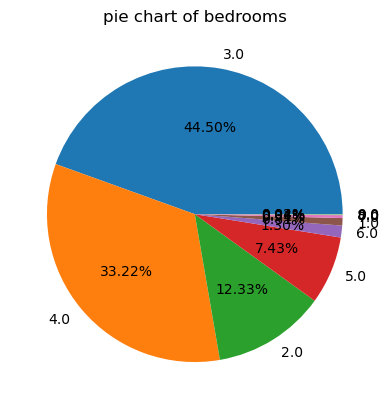

In [51]:
plt.title("pie chart of bedrooms")
plt.pie(data.values,labels=data.index,autopct='%.2f%%')
plt.show()

# Conclussion
- we can see that there are only 2 house that contain `8 bedroom` 2 house that conatin `0 bedrrom` and only 1 house that conatin `9 bedrooms` we can simply remove these values.
- we can remove all those rows whose count is less then 10

**Try to handle those rows where house count is less then 15**

In [52]:
bedroom_counts=df['bedrooms'].value_counts()
bedroom_index=bedroom_counts[bedroom_counts>=12].index
data=df[df['bedrooms'].isin(bedroom_index)]['bedrooms'].value_counts()

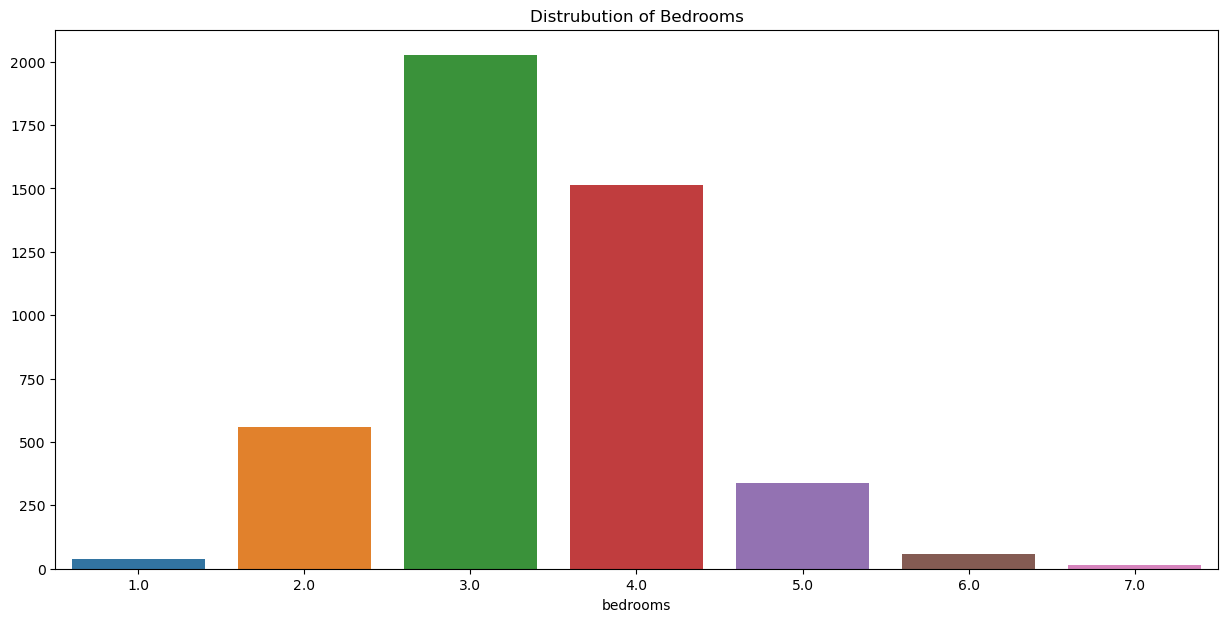

In [53]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of Bedrooms")
sns.barplot(x=data.index,y=data.values)
plt.show()

### Bathrooms

In [54]:
data=df['bathrooms'].value_counts()
data

bathrooms
2.50    1184
1.00     736
1.75     628
2.00     425
2.25     413
1.50     287
2.75     270
3.00     164
3.50     159
3.25     135
3.75      34
4.50      26
4.25      22
4.00      21
0.75      17
4.75       7
5.00       5
5.25       4
5.50       4
1.25       3
0.00       2
8.00       1
5.75       1
6.50       1
6.25       1
6.75       1
Name: count, dtype: int64

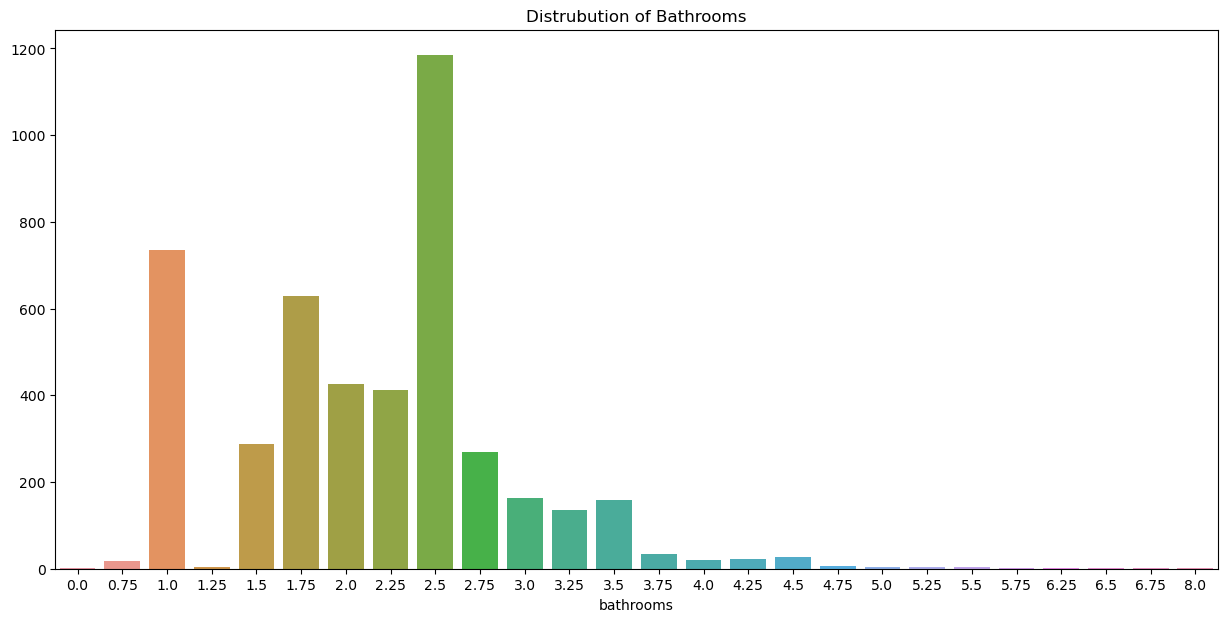

In [55]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of Bathrooms")
sns.barplot(x=data.index,y=data.values)
plt.show()

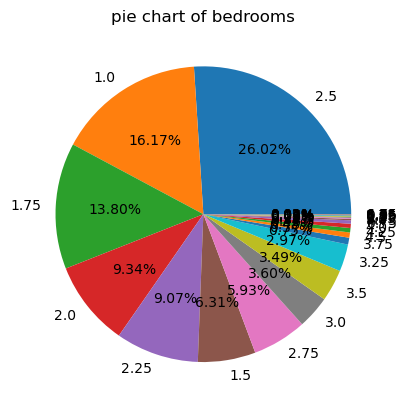

In [56]:
plt.title("pie chart of bedrooms")
plt.pie(data.values,labels=data.index,autopct='%.2f%%')
plt.show()

# Conclussion
- Similarly some problem in `bathrooms` col.
- We can remove all those rows whose count is less then 20.
- Same stragety we can apply in this

In [57]:
bathroom_count=df['bathrooms'].value_counts()
bathroom_keep=bathroom_count[bathroom_count>=12].index
data=df[df['bathrooms'].isin(bathroom_keep)]['bathrooms'].value_counts()

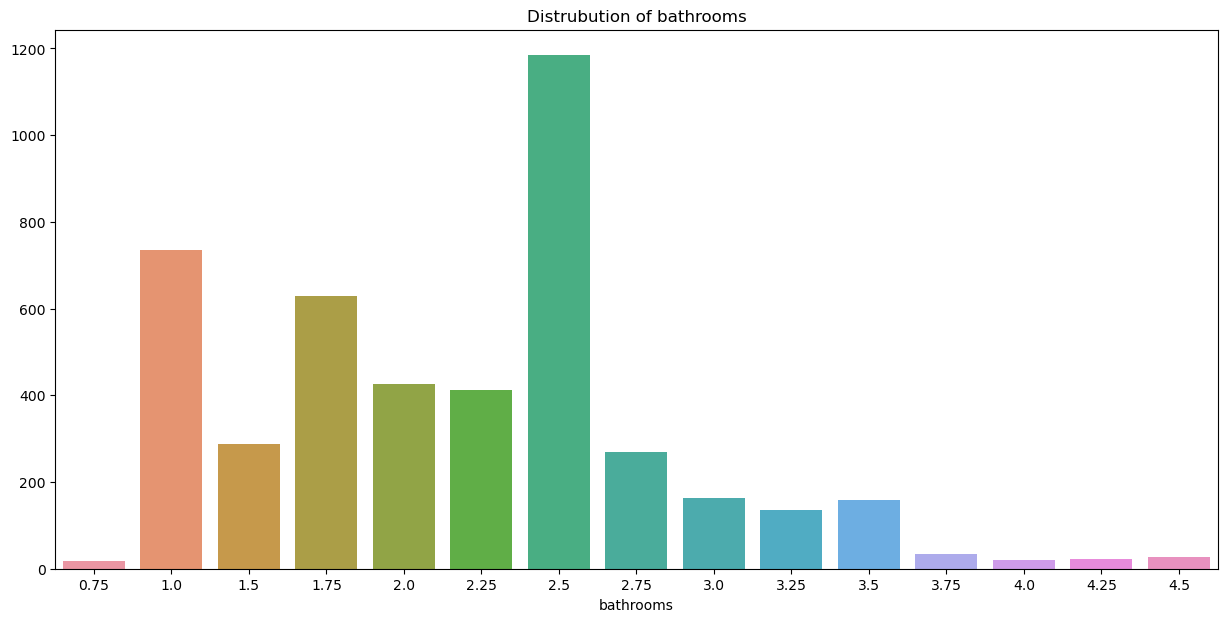

In [58]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of bathrooms")
sns.barplot(x=data.index,y=data.values)
plt.show()

## Floors 

In [59]:
data=df['floors'].value_counts()
data

floors
1.0    2151
2.0    1791
1.5     439
3.0     127
2.5      41
3.5       2
Name: count, dtype: int64

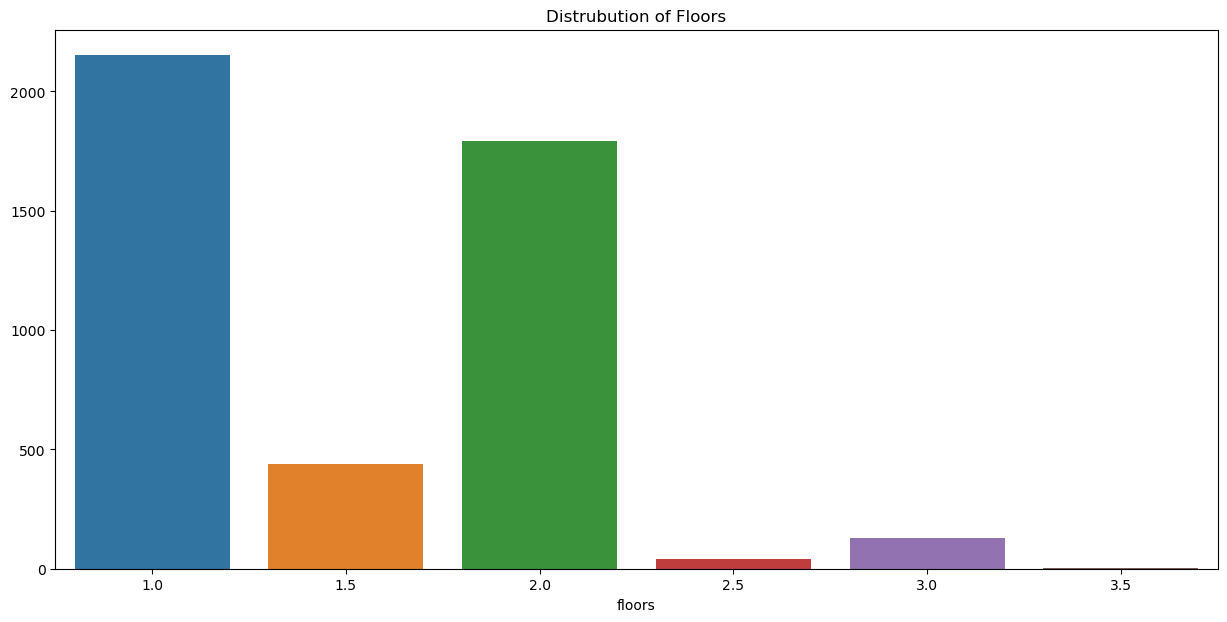

In [60]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of Floors")
sns.barplot(x=data.index,y=data.values)
plt.show()

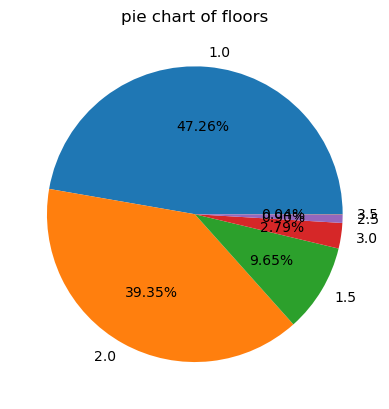

In [61]:
plt.title("pie chart of floors")
plt.pie(data.values,labels=data.index,autopct='%.2f%%')
plt.show()

# Conclussion
- One point is notice i-e there is only 2 house that conation `3.5 floors`

# Water front

In [62]:
data=df['waterfront'].value_counts()
data

waterfront
0    4521
1      30
Name: count, dtype: int64

In [63]:
data=df['waterfront'].value_counts(normalize=True)*100
data

waterfront
0    99.340804
1     0.659196
Name: proportion, dtype: float64

# Conclussion
- This colum are the quasi constant colum.
- Mean that `99.5%` house can't conatin water front and only `0.5%` house conatin water front
- We can remove this columns b/c it can't give any reasonable information about house so we can simply remove them.

## view

In [64]:
data=df['view'].value_counts()
data

view
0    4103
2     201
3     115
1      69
4      63
Name: count, dtype: int64

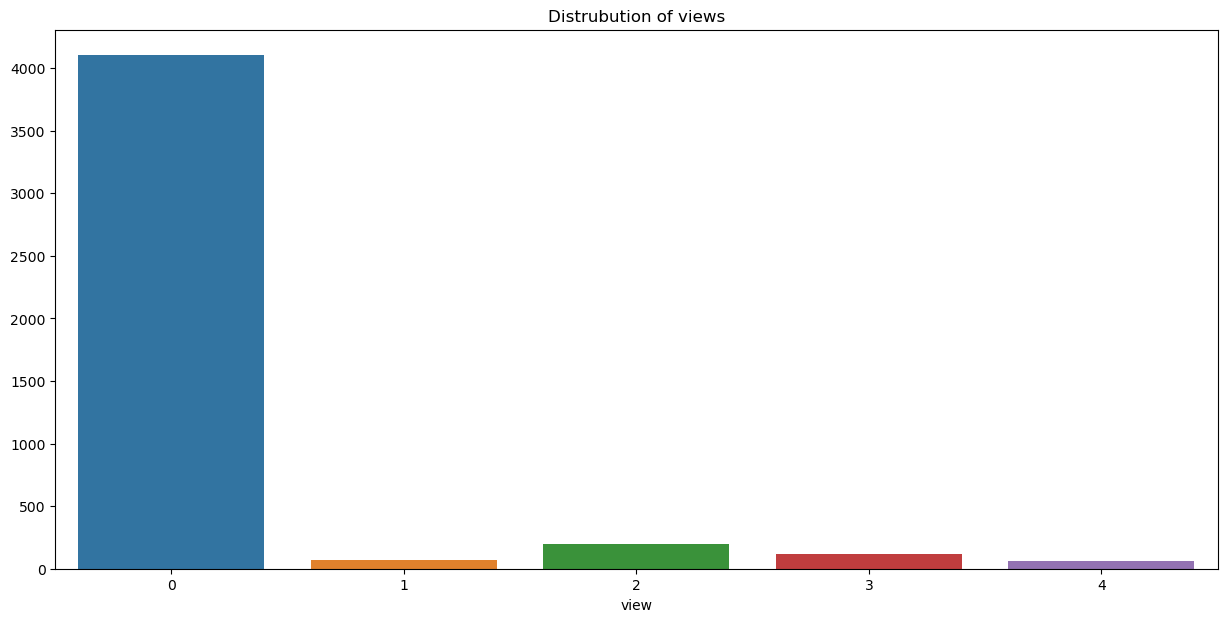

In [65]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of views")
sns.barplot(x=data.index,y=data.values)
plt.show()

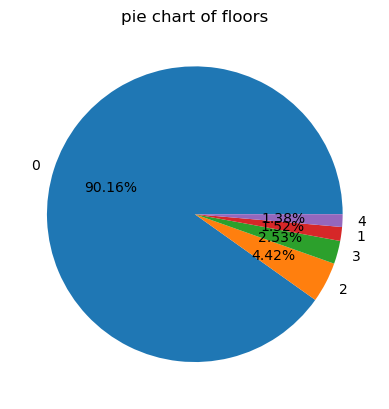

In [66]:
plt.title("pie chart of floors")
plt.pie(data.values,labels=data.index,autopct='%.2f%%')
plt.show()

# Conclussion
- we can see that `90%` people can't view the house before buyying and remaing `10%` people can see the house before house buy.

## City

In [67]:
data=df['city'].value_counts()
data

city
Seattle                1561
Renton                  291
Bellevue                281
Redmond                 235
Kirkland                187
Issaquah                186
Kent                    184
Auburn                  175
Sammamish               171
Federal Way             145
Shoreline               123
Woodinville             114
Maple Valley             95
Mercer Island            82
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
North Bend               50
Duvall                   42
Covington                42
Lake Forest Park         34
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   29
SeaTac                   28
Enumclaw                 27
Carnation                22
Normandy Park            17
Fall City                11
Medina                   11
Clyde Hill                9
Black Diamond             8
Ravensdale                7
Pacific        

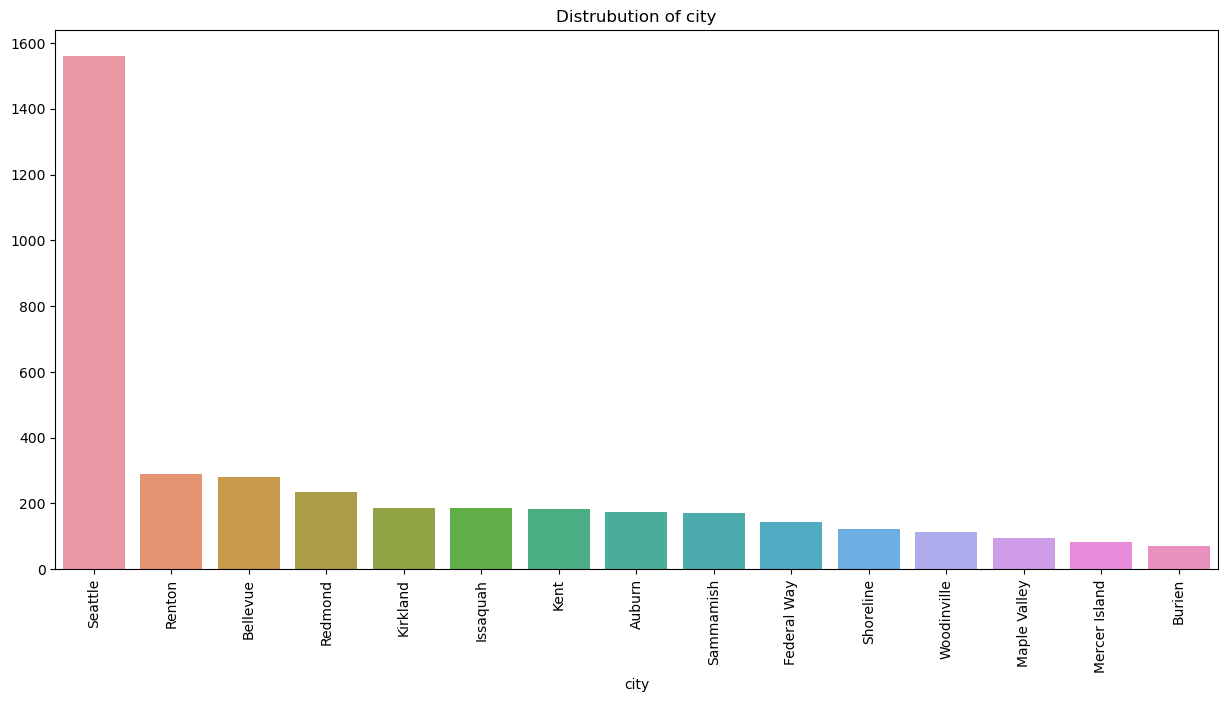

In [68]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of city")
sns.barplot(x=data.nlargest(15).index,y=data.nlargest(15).values)
plt.xticks(rotation='vertical')
plt.show()

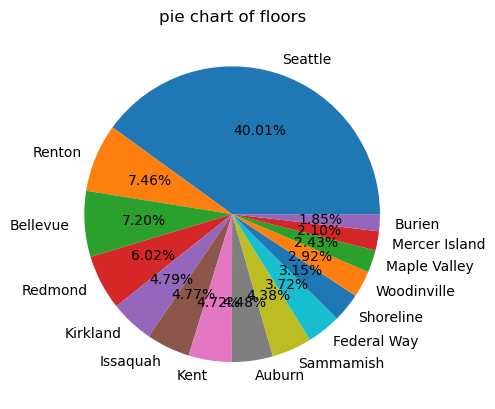

In [69]:
plt.title("pie chart of floors")
plt.pie(data.nlargest(15).values,
        labels=data.nlargest(15).index,autopct='%.2f%%')
plt.show()

# Conclussion
- Top 15 city in which hosue are most sold more.

# Bi-variate Analysis
## Price vs date

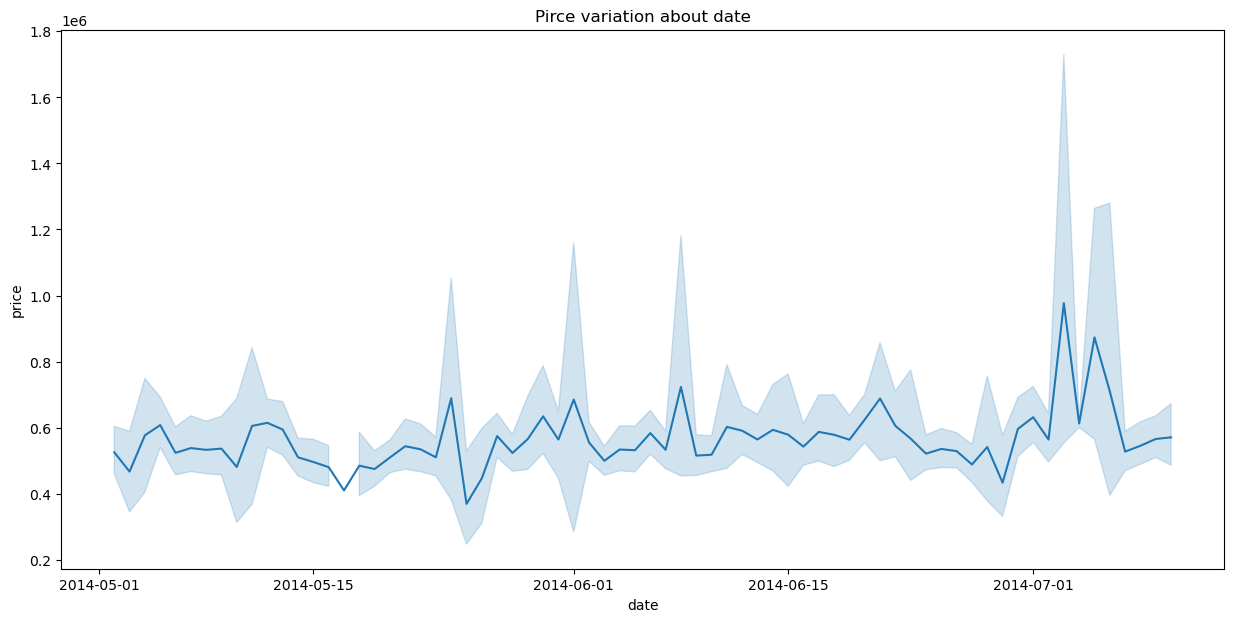

In [70]:
plt.figure(figsize=(15,7))
plt.title("Pirce variation about date")
sns.lineplot(x=df['date'],y=df['price'])
plt.show()

# Conclussion
- This data conatain the information only year `2014` and 3 months `4,6 and 7`.
- we can see that price should increase based on time.

# Price vs sqft_living

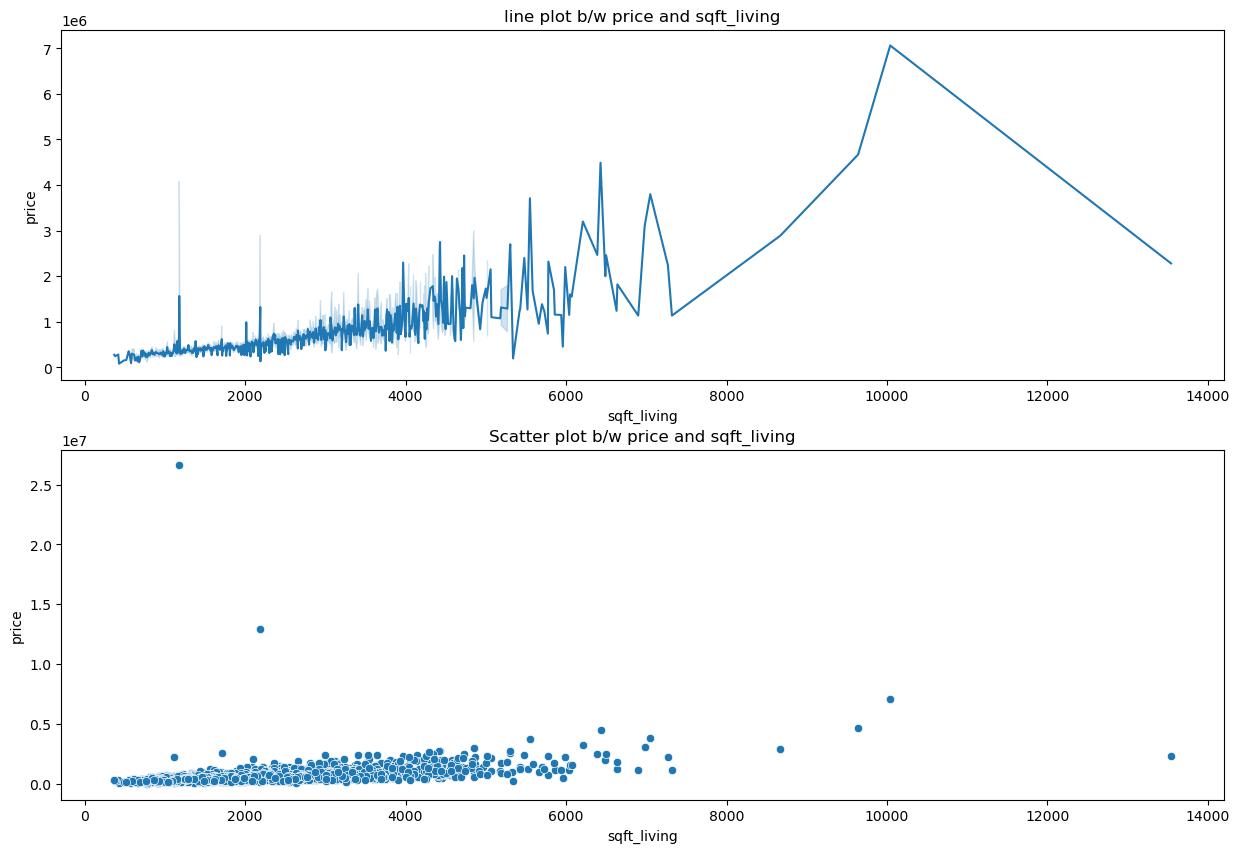

In [71]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,10))
ax1.set_title("line plot b/w price and sqft_living")
sns.lineplot(x=df['sqft_living'],y=df['price'],ax=ax1)

ax2.set_title("Scatter plot b/w price and sqft_living")
sns.scatterplot(x=df['sqft_living'],y=df['price'],ax=ax2)
plt.show()

# Conclussion
- We can see there is a linear relationship b/w `price` and `sqft_living`.
- If the `sqft_living` increase `price` increase and if `sqft_living` decrease `price` also decrease.

# Price vs sqft_lot

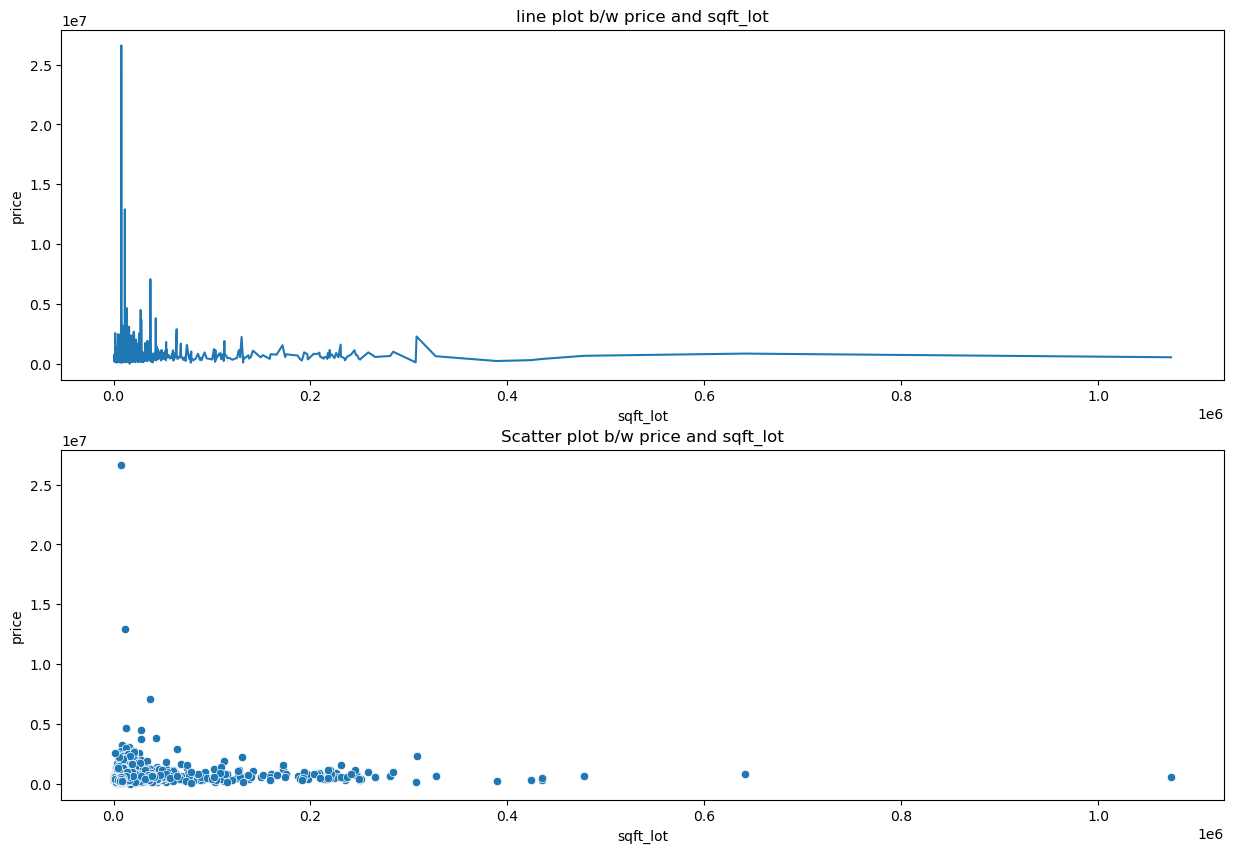

In [72]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,10))
ax1.set_title("line plot b/w price and sqft_lot")
sns.lineplot(x=df['sqft_lot'],y=df['price'],ax=ax1)

ax2.set_title("Scatter plot b/w price and sqft_lot")
sns.scatterplot(x=df['sqft_lot'],y=df['price'],ax=ax2)
plt.show()

# Conclussion
- We can see that there is no patteren b/w `price` and `sqft_lot`

# Price vs sqft_basement

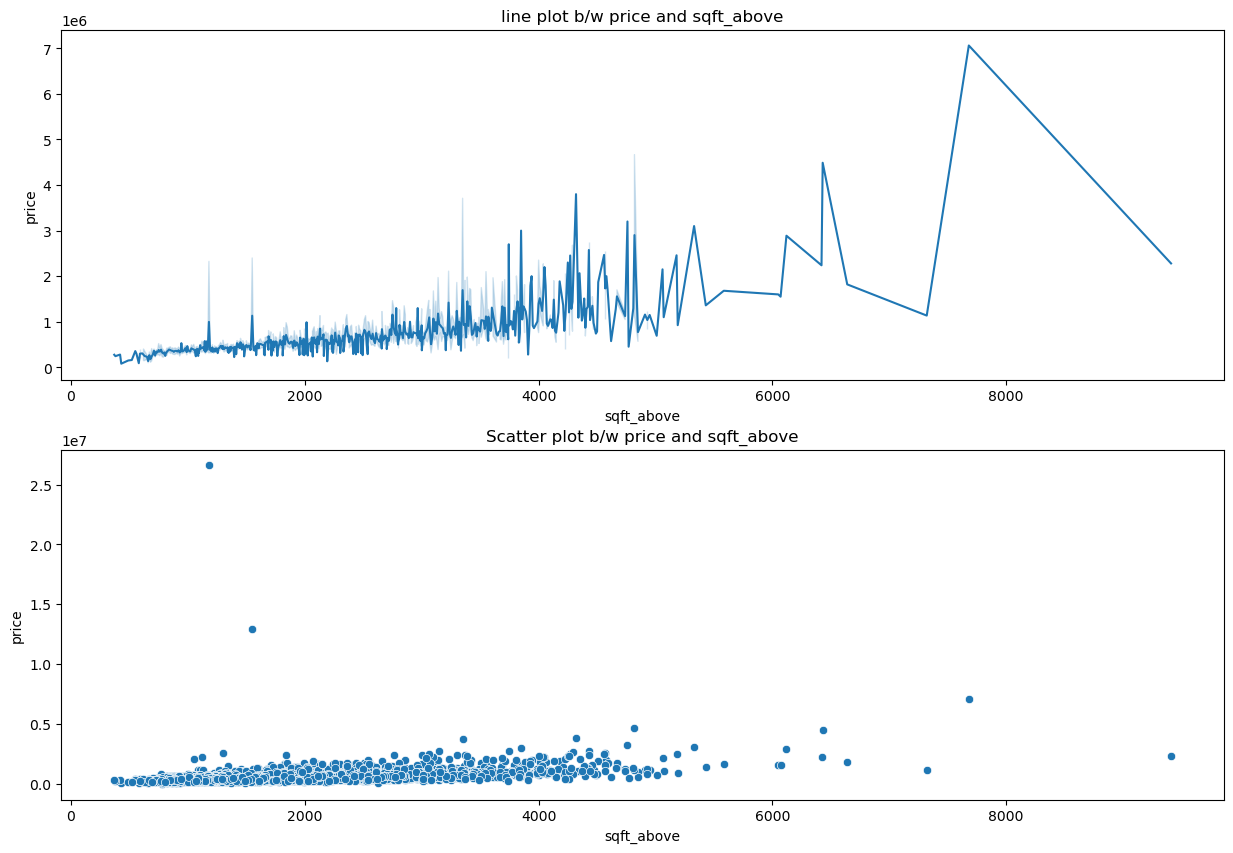

In [73]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,10))
ax1.set_title("line plot b/w price and sqft_above")
sns.lineplot(x=df['sqft_above'],y=df['price'],ax=ax1)

ax2.set_title("Scatter plot b/w price and sqft_above")
sns.scatterplot(x=df['sqft_above'],y=df['price'],ax=ax2)
plt.show()

# Conclussion
- we can see there is also a linear relationship b/w `sqft_above` and `price`.
- If `sqft_above` increase `price` also increse and if `sqft_abov` decrease `price` also decrease.

# Price vs sqft_basement

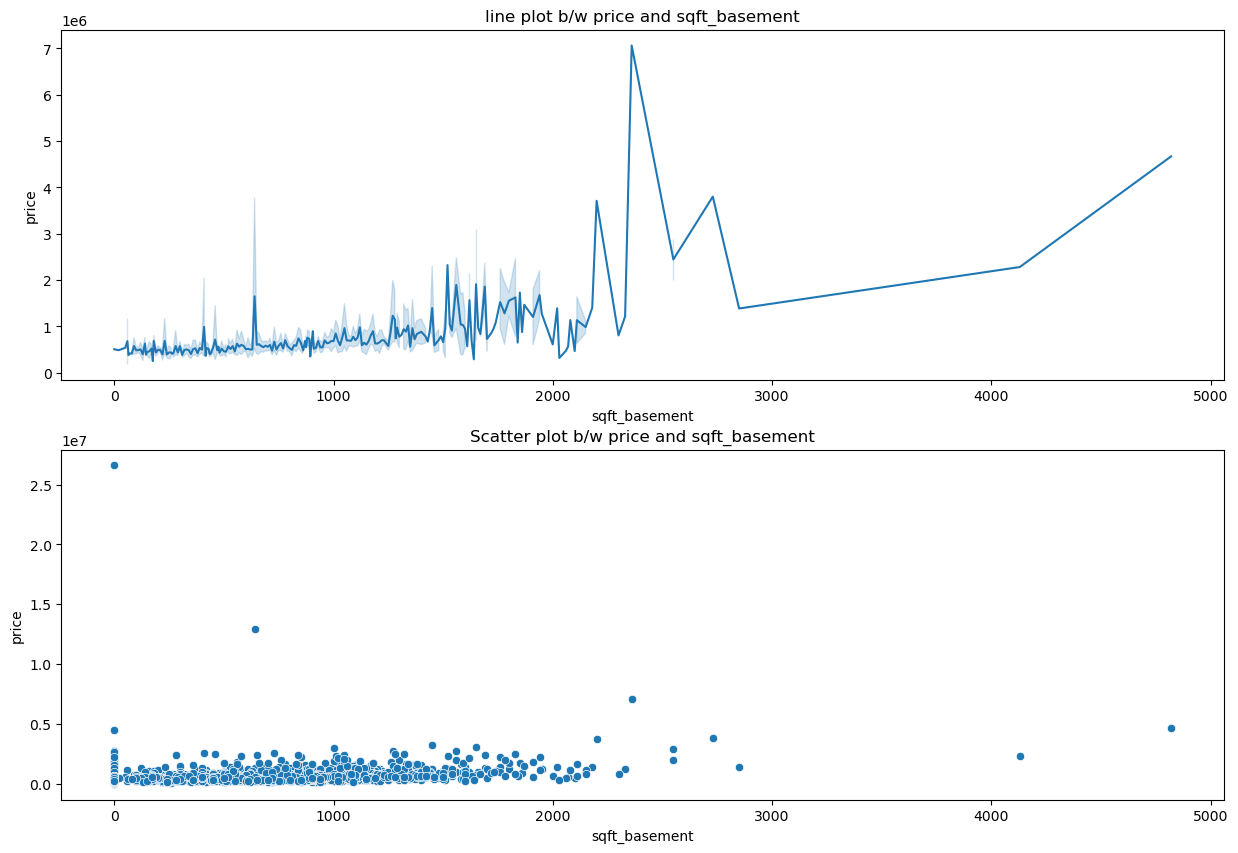

In [74]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,10))
ax1.set_title("line plot b/w price and sqft_basement")
sns.lineplot(x=df['sqft_basement'],y=df['price'],ax=ax1)

ax2.set_title("Scatter plot b/w price and sqft_basement")
sns.scatterplot(x=df['sqft_basement'],y=df['price'],ax=ax2)
plt.show()

# Conclussion
- we can see there is also a sort of linear relationship b/w `sqft_above` and `price`.
- If `sqft_above` increase `price` also increse and if `sqft_abov` decrease `price` also decrease.

# Yr_build vs price

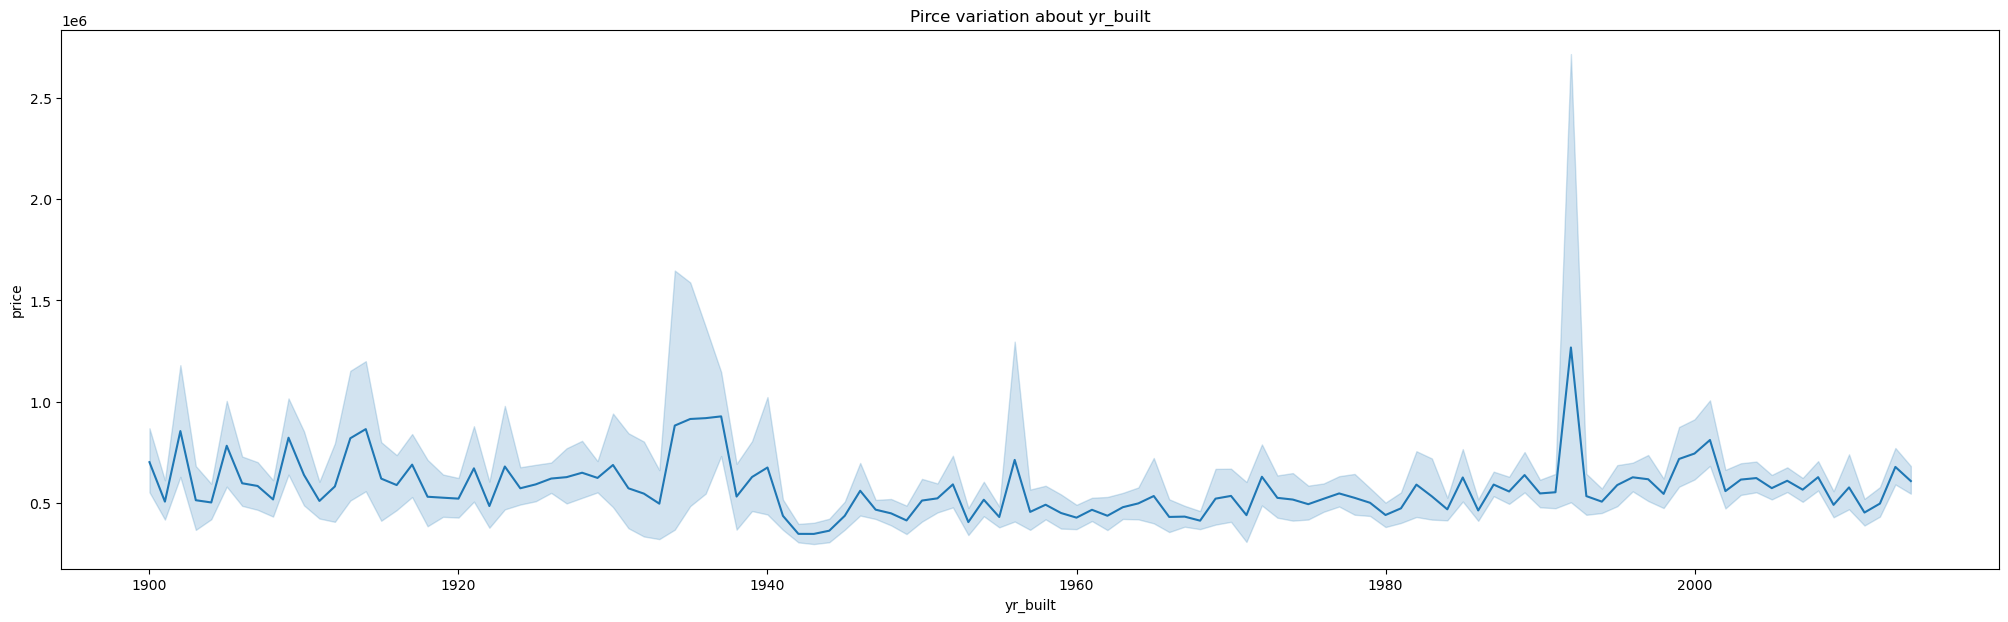

In [75]:
plt.figure(figsize=(25,7))
plt.title("Pirce variation about yr_built")
sns.lineplot(x=df['yr_built'],y=df['price'])
plt.show()

# yr_renovated vs price

In [76]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA


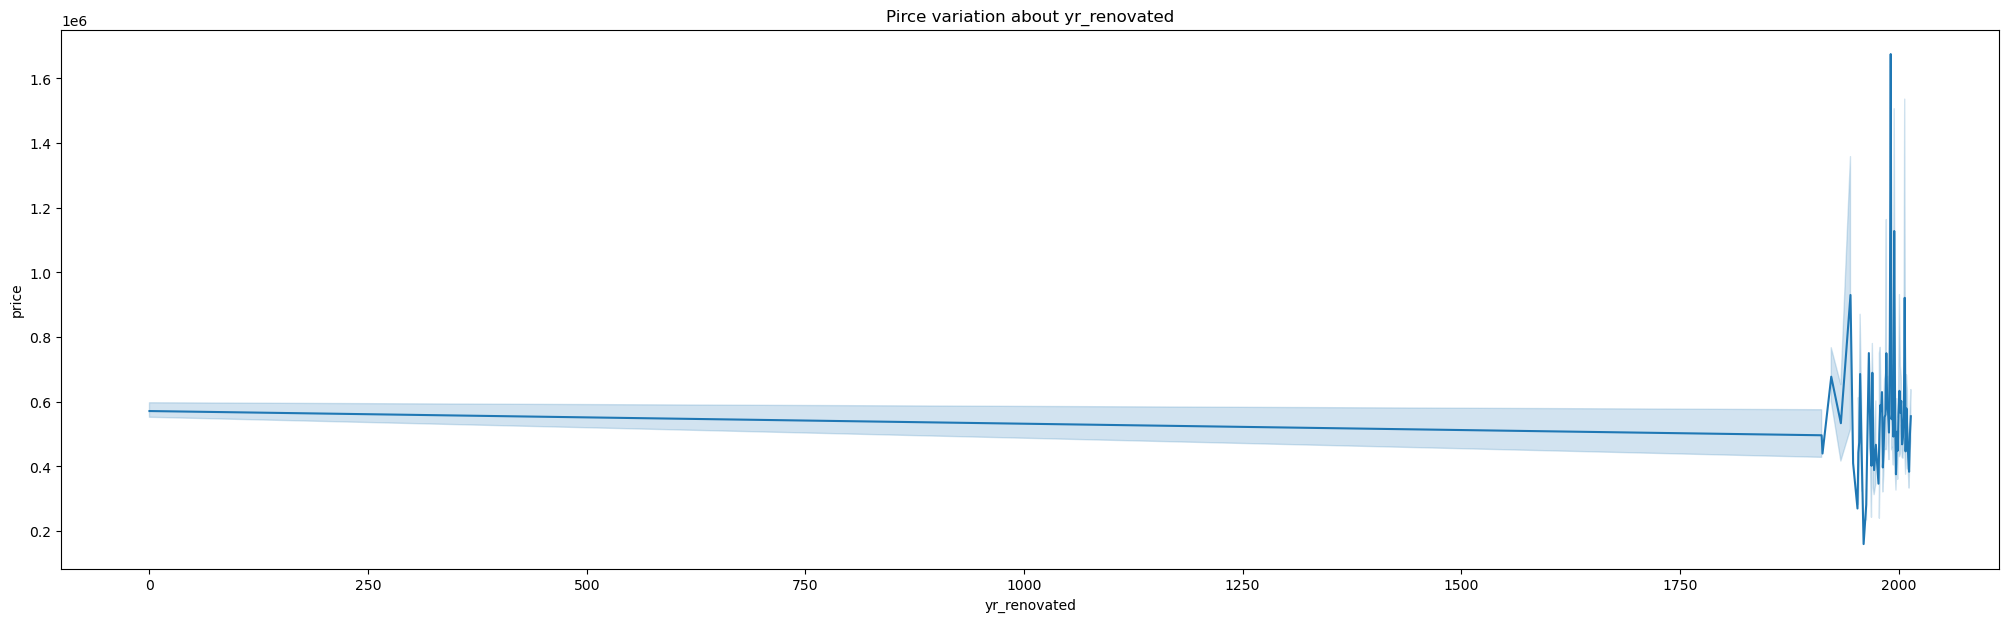

In [77]:
plt.figure(figsize=(25,7))
plt.title("Pirce variation about yr_renovated")
sns.lineplot(x=df['yr_renovated'],y=df['price'])
plt.show()

# Conclussion
- We see that they are negatively correled.
- Mean if the person can renovate the the price of the house should be decrese and if perseon can't renovate the house it price definately increase.
- Renovate mean repair or modify.

# Numerical vs Categorical

## price vs bedrooms

In [78]:
data=df.groupby(['bedrooms'])['price'].mean()
data

bedrooms
0.0    1.195324e+06
1.0    2.814838e+05
2.0    3.951123e+05
3.0    4.903021e+05
4.0    6.431004e+05
5.0    8.043658e+05
6.0    8.450701e+05
7.0    1.049429e+06
8.0    1.155000e+06
9.0    5.999990e+05
Name: price, dtype: float64

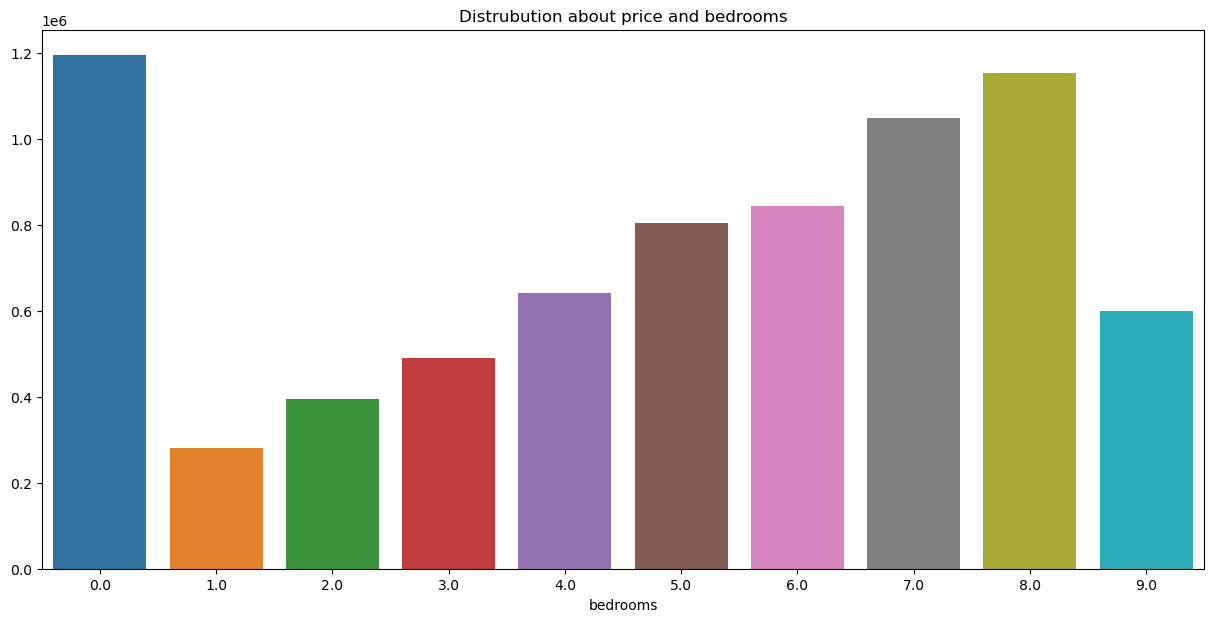

In [79]:
plt.figure(figsize=(15,7))
plt.title("Distrubution about price and bedrooms")
sns.barplot(x=data.index,y=data.values)
plt.show()

# conclussion
- we can see that those house which have 0 bedroom whose price is too high.
- Let check these house.

## Important 

In [80]:
df[df['bedrooms']==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
2365,2014-06-12,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,Seattle,USA
3209,2014-06-24,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,Redmond,USA


- **There is only `2 house` whose conatin 0 bedrooms and it price is  too high.**
- **Actually these are the `outliers` we can remove them**

In [81]:
data2=df[~(df['bedrooms']==0)].groupby(['bedrooms'])['price'].mean()
data2

bedrooms
1.0    2.814838e+05
2.0    3.951123e+05
3.0    4.903021e+05
4.0    6.431004e+05
5.0    8.043658e+05
6.0    8.450701e+05
7.0    1.049429e+06
8.0    1.155000e+06
9.0    5.999990e+05
Name: price, dtype: float64

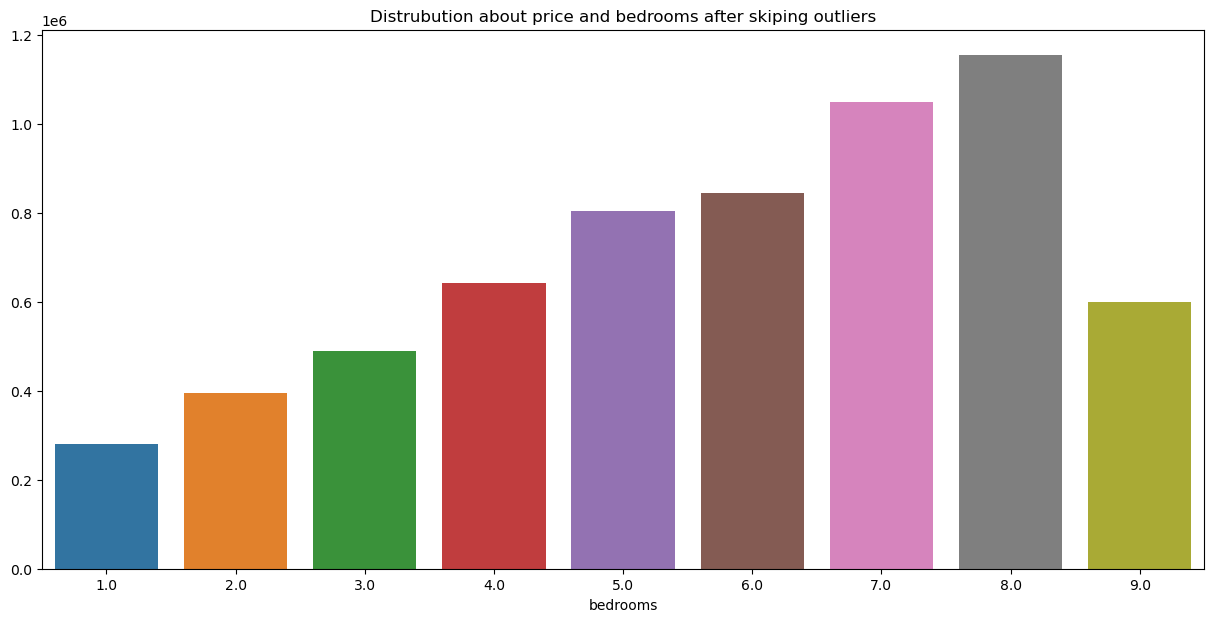

In [82]:
plt.figure(figsize=(15,7))
plt.title("Distrubution about price and bedrooms after skiping outliers")
sns.barplot(x=data2.index,y=data2.values)
plt.show()

# price vs bathrooms

In [83]:
data=df.groupby(['bathrooms'])['price'].mean()
data

bathrooms
0.00    1.195324e+06
0.75    2.939559e+05
1.00    3.357841e+05
1.25    4.611500e+05
1.50    4.167731e+05
1.75    4.602814e+05
2.00    5.293373e+05
2.25    5.449825e+05
2.50    5.751237e+05
2.75    6.577229e+05
3.00    7.184702e+05
3.25    9.512357e+05
3.50    9.200404e+05
3.75    9.809139e+05
4.00    1.050373e+06
4.25    1.460371e+06
4.50    1.538469e+06
4.75    1.934621e+06
5.00    1.135406e+06
5.25    1.463500e+06
5.50    2.028750e+06
5.75    5.400000e+05
6.25    2.888000e+06
6.50    2.238888e+06
6.75    4.668000e+06
8.00    2.280000e+06
Name: price, dtype: float64

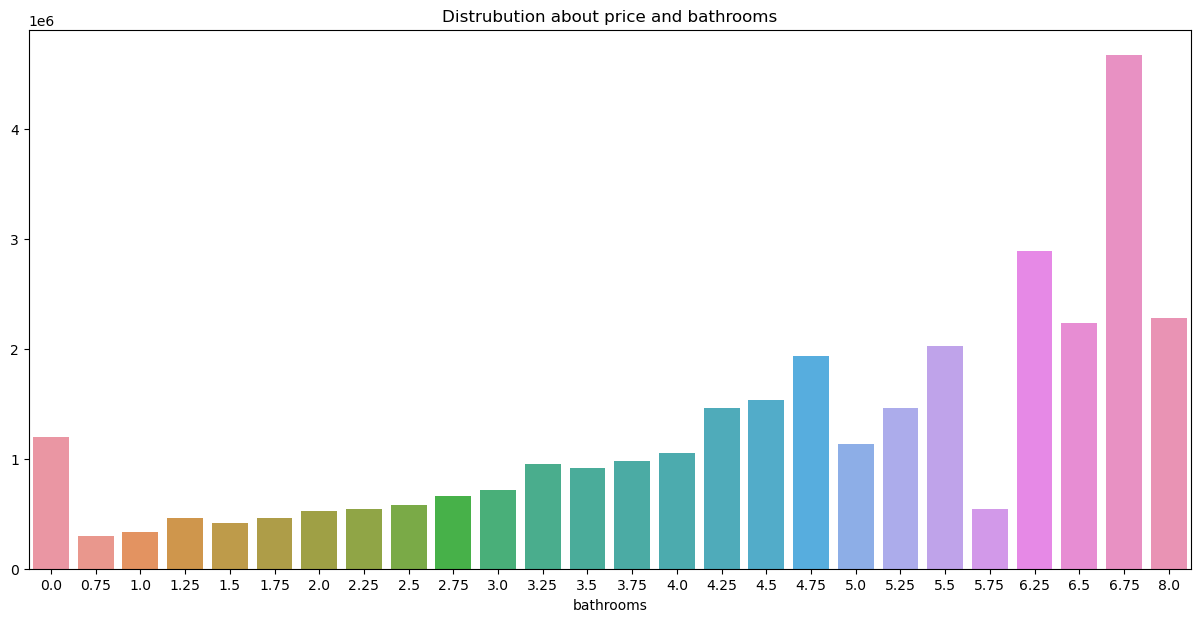

In [84]:
plt.figure(figsize=(15,7))
plt.title("Distrubution about price and bathrooms")
sns.barplot(x=data.index,y=data.values)
plt.show()

# conclussion
- we can see that those house which have 0 bedroom whose price is too high.
- Let check these house.

# Important

In [85]:
df[df['bathrooms']==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
2365,2014-06-12,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,Seattle,USA
3209,2014-06-24,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,Redmond,USA


In [86]:
data2=df[~(df['bathrooms']==0)].groupby(['bathrooms'])['price'].mean()
data2

bathrooms
0.75    2.939559e+05
1.00    3.357841e+05
1.25    4.611500e+05
1.50    4.167731e+05
1.75    4.602814e+05
2.00    5.293373e+05
2.25    5.449825e+05
2.50    5.751237e+05
2.75    6.577229e+05
3.00    7.184702e+05
3.25    9.512357e+05
3.50    9.200404e+05
3.75    9.809139e+05
4.00    1.050373e+06
4.25    1.460371e+06
4.50    1.538469e+06
4.75    1.934621e+06
5.00    1.135406e+06
5.25    1.463500e+06
5.50    2.028750e+06
5.75    5.400000e+05
6.25    2.888000e+06
6.50    2.238888e+06
6.75    4.668000e+06
8.00    2.280000e+06
Name: price, dtype: float64

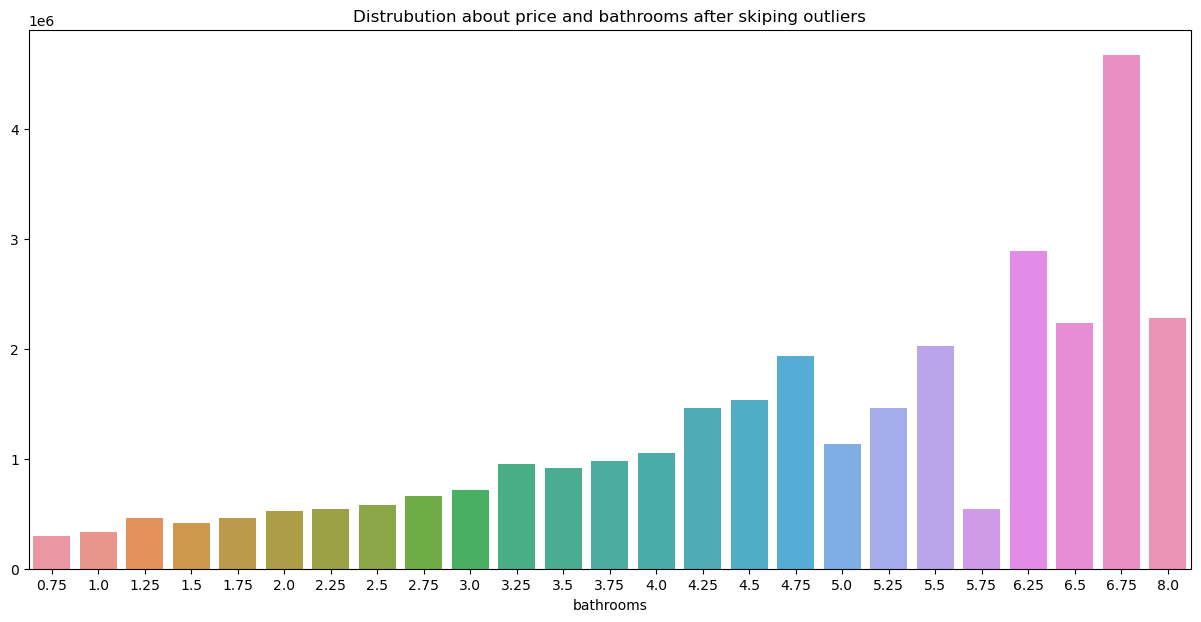

In [87]:
plt.figure(figsize=(15,7))
plt.title("Distrubution about price and bathrooms after skiping outliers")
sns.barplot(x=data2.index,y=data2.values)
plt.show()

# Conclussion
- After removign outlier vaulue we can see that there is a linear pattrern b/w price and bathrooms.
- Means more bathroom have larger price and less bathrooms means less price.

# Price vs floors

In [88]:
data=df.groupby(['floors'])['price'].mean()
data

floors
1.0    462168.231569
1.5    585283.733253
2.0    655221.246093
2.5    983863.390244
3.0    570615.521435
3.5    829250.000000
Name: price, dtype: float64

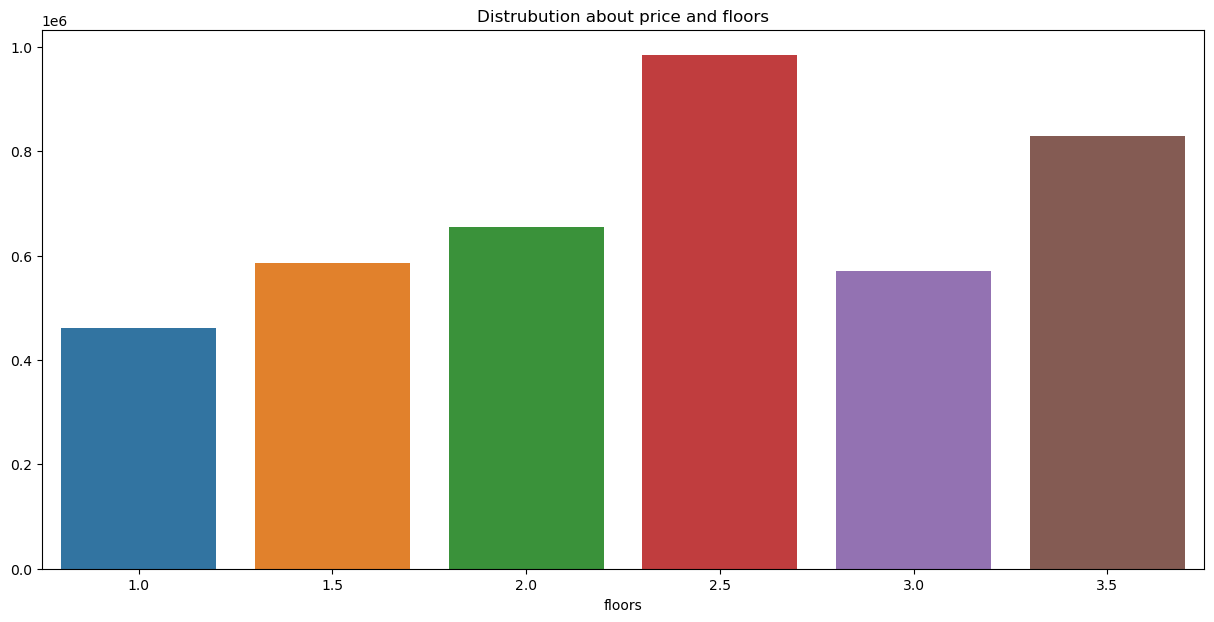

In [89]:
plt.figure(figsize=(15,7))
plt.title("Distrubution about price and floors")
sns.barplot(x=data.index,y=data.values)
plt.show()

# Price vs condition

In [90]:
data=df.groupby(['condition'])['price'].mean()
data

condition
1    306633.333333
2    334837.419355
3    554742.409552
4    539682.069598
5    652030.529840
Name: price, dtype: float64

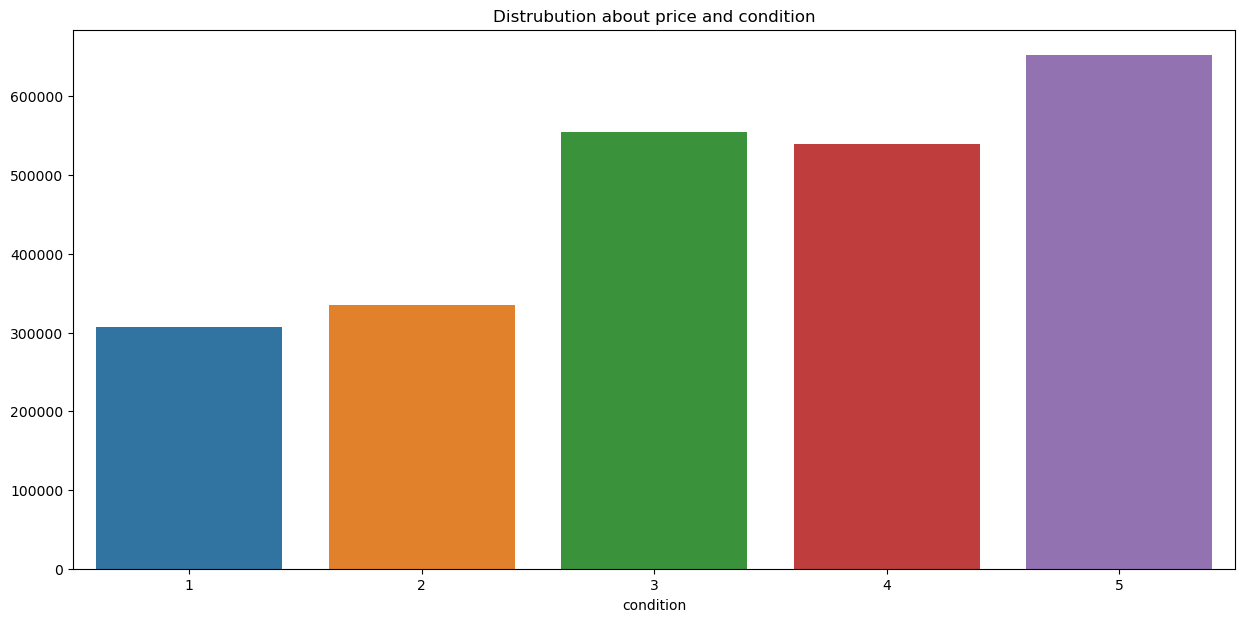

In [91]:
plt.figure(figsize=(15,7))
plt.title("Distrubution about price and condition")
sns.barplot(x=data.index,y=data.values)
plt.show()

# Conclussion
- It is linear pattern high nbr show the good conditon and less nbr show not good condition.
- It is natural if the conditon of the hosue is high price is also high.

# price vs city

In [92]:
data=df.groupby(['city'])['price'].mean()
data

city
Algona                 2.072880e+05
Auburn                 3.010510e+05
Beaux Arts Village     7.450000e+05
Bellevue               8.622551e+05
Black Diamond          3.820562e+05
Bothell                4.814419e+05
Burien                 3.586402e+05
Carnation              5.087520e+05
Clyde Hill             1.615711e+06
Covington              3.032835e+05
Des Moines             3.049925e+05
Duvall                 4.039941e+05
Enumclaw               3.190077e+05
Fall City              6.926818e+05
Federal Way            2.958854e+05
Inglewood-Finn Hill    4.250000e+05
Issaquah               5.993689e+05
Kenmore                4.543786e+05
Kent                   4.418810e+05
Kirkland               6.515836e+05
Lake Forest Park       4.748559e+05
Maple Valley           3.400168e+05
Medina                 2.046559e+06
Mercer Island          1.178638e+06
Milton                 2.850000e+05
Newcastle              6.660467e+05
Normandy Park          5.366044e+05
North Bend             

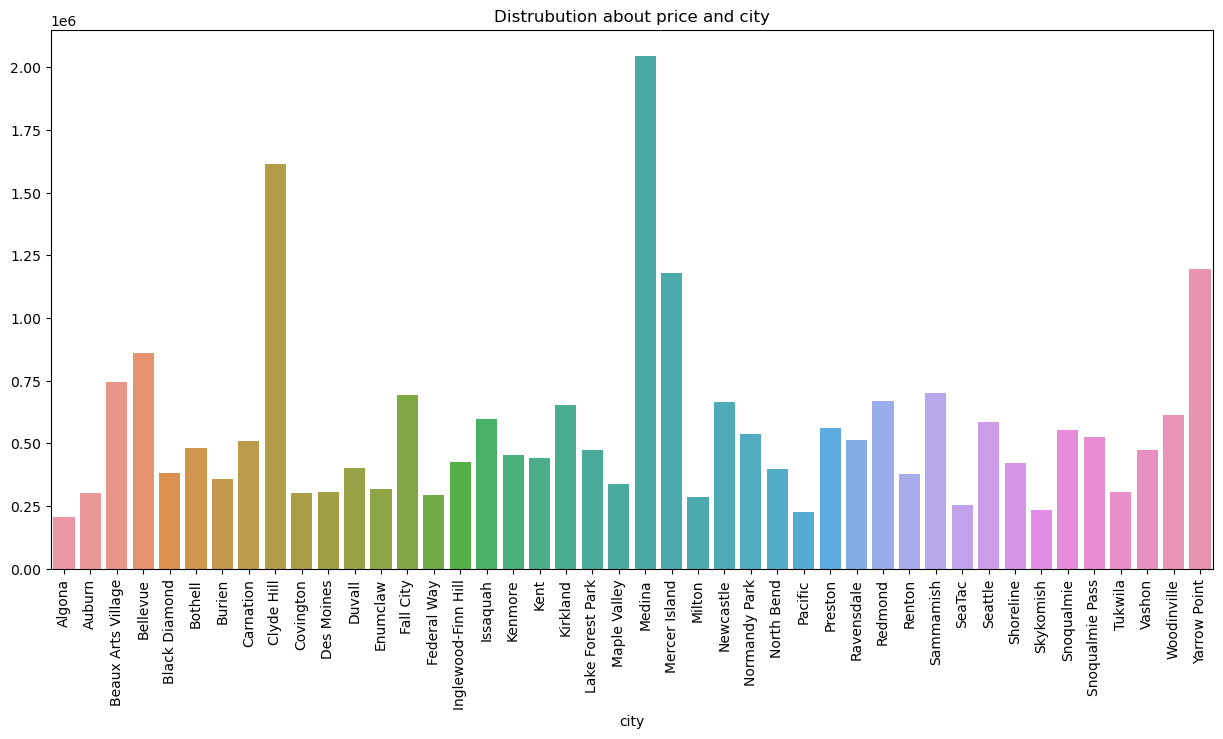

In [93]:
plt.figure(figsize=(15,7))
plt.title("Distrubution about price and city")
sns.barplot(x=data.index,y=data.values)
plt.xticks(rotation='vertical')
plt.show()

# Conclussion
- We can see there is a certian cities where price of the hosue is too high.
- Some cities like `clyde hill, medina,mercer island and yarrow point`.
- These are the cities where price is too high rather then others.

In [94]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA


# Correlaion Matrix

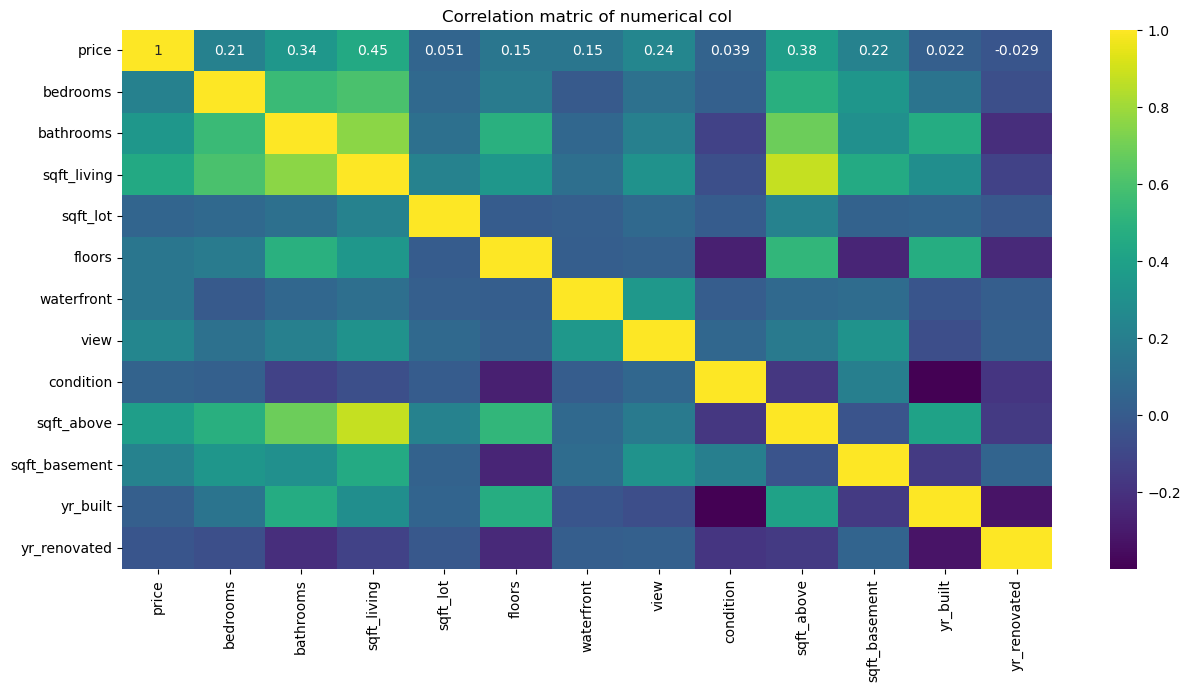

In [95]:
plt.figure(figsize=(15,7))
plt.title("Correlation matric of numerical col")
sns.heatmap(df.select_dtypes("number").corr(),annot=True,cmap='viridis')
plt.show()

In [96]:
df.select_dtypes("number").corr()['price']*100

price            100.000000
bedrooms          21.022759
bathrooms         34.112592
sqft_living       44.549371
sqft_lot           5.134733
floors            15.275831
waterfront        15.008259
view              24.258747
condition          3.889172
sqft_above        38.066094
sqft_basement     21.778233
yr_built           2.175681
yr_renovated      -2.903374
Name: price, dtype: float64

# Conclussion
- `sqft_living` -> `67.67722`
- `sqft_lot` ->     `8.362860`
- `sqft_above`=>     `57.675864`
- `sqft_basement` ->  `29.060990`

- **These columns tell us the infomation about the same thing i-e area of the house and they are highly corelated to target col.**
- Check the pairwise relation of these columns

In [97]:
df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']].corr()*100

,sqft_living,sqft_lot,sqft_above,sqft_basement
sqft_living,100.000000,21.326756,87.565653,44.967103
sqft_lot,21.326756,100.000000,21.919324,3.589438
sqft_above,87.565653,21.919324,100.000000,-3.759685
sqft_basement,44.967103,3.589438,-3.759685,100.000000


# Conclussion
- We can see `sqft_living` and `sqft_above` are highly correated to each other so we can keep `sqft living` and drop `sqft_above`

In [98]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA


# Feature Engnering
- In Feature Engnering we can drop the `sqft above` b/c they are highly correleated to `sqft living`.
- we can remove those rows from bathrom and bedroom whose count is less.
- **Drop Unecessaty Col**
    - `Water Front` B./c they are quaci constant col.
    - `Sqft above` b/c they are highly correlated to `sqft living`
    - `date` b/c data should only 1 year and 3 month so for 1 year data should not vary.

In [100]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA


In [109]:
df.drop(columns=['waterfront','sqft_above','date'],inplace=True)

In [110]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,3.0,1.5,1340,7912,1.5,0,3,0,1955,2005,Shoreline,USA
1,2384000.0,5.0,2.5,3650,9050,2.0,4,5,280,1921,0,Seattle,USA


In [117]:
df=df[(df['bathrooms'].isin(bathroom_keep))]

# Conclussion
- After removing the less count nbr from `bathroom` we see `bedrooms` should stablish.

In [119]:
df[df['bedrooms'].isin(bedroom_index)]['bedrooms'].value_counts()

bedrooms
3.0    2025
4.0    1507
2.0     559
5.0     324
6.0      56
1.0      36
7.0      11
Name: count, dtype: int64

In [120]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,0,1955,2005,Shoreline,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,280,1921,0,Seattle,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,0,1966,0,Kent,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1963,0,Bellevue,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,800,1976,1992,Redmond,USA


# Apply Winserization on outliers columns

In [123]:
def winsertzation(col):
    low=df[col].quantile(0.01)
    high=df[col].quantile(0.99)
    
    df[col]=df[col].clip(lower=low,upper=high)
    return df[col]

In [126]:
df["sqft_living"]=winsertzation("sqft_living")
df["sqft_lot"]=winsertzation("sqft_lot")
df["sqft_basement"]=winsertzation("sqft_basement")

In [130]:
df['price']=winsertzation('price')

In [131]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,3.0,1.50,1340,7912.0,1.5,0,3,0,1955,2005,Shoreline,USA
1,1893340.0,5.0,2.50,3650,9050.0,2.0,4,5,280,1921,0,Seattle,USA
2,342000.0,3.0,2.00,1930,11947.0,1.0,0,4,0,1966,0,Kent,USA
3,420000.0,3.0,2.25,2000,8030.0,1.0,0,4,1000,1963,0,Bellevue,USA
4,550000.0,4.0,2.50,1940,10500.0,1.0,0,4,800,1976,1992,Redmond,USA


# Exporting
- we can export this data so that i can train the model

In [132]:
df.to_csv("house_clean.csv",index=False)

<Axes: >

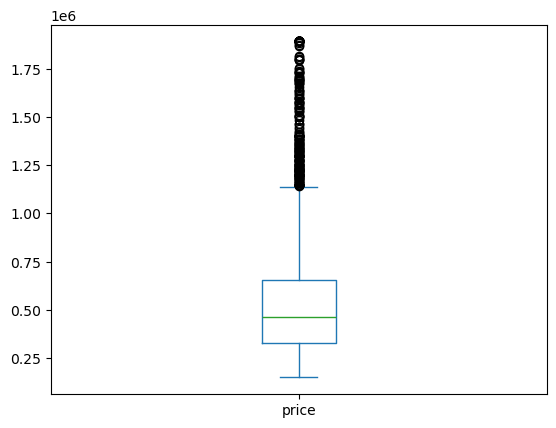

In [133]:
df['price'].plot(kind='box')